### Higher frequency sampling: use the core of readin for the case definition

Use the kernel of ReadIn.ipynb to get the definition of case1.

In [1]:
from scipy.stats import norm, kurtosis
from matplotlib import pyplot as plt

import matplotlib as mpl
plt.style.use('/projects/DEIKE/jiarongw/jiarongw-postprocessing/media/matplotlib/stylelib/jfm.mplstyle')

import pandas as pd
from matplotlib.ticker import FuncFormatter, MultipleLocator
from scipy.signal import butter,filtfilt
from prepare import butter_lowpass_filter

In [2]:
""" A modified version of creat new phase """

import os
from tqdm import tqdm
from prepare import load_object, save_object

def extract_phase_highfreq (case, tsimu, PRE=False):      
    picklename = case.path + 'restart_highfreq/eta_highfreq/' + 'phase_info_t%g' %tsimu[0]+'.pkl'
    exists = os.path.exists(picklename)
    # If the pickle is there read in the pickles, and check that time array agrees.
    if exists:
        phase_highfreq = load_object(picklename)
        print('pickle restored!')
        if len(np.array(phase_highfreq['t'])) != len(tsimu):
            print('But not the same time array!')
            phase_old = phase_highfreq.copy()
            phase_highfreq = create_new_phase_highfreq (case, tsimu, PRE=PRE, ADDITIVE=True, phase_old=phase_old)
    # Else initiate the array from scratch 
    else:
        phase_highfreq = create_new_phase_highfreq (case, tsimu, PRE=PRE, ADDITIVE=False)
    return phase_highfreq

def create_new_phase_highfreq(case, tsimu, PRE=False, ADDITIVE=False, phase_old=None):
    phase_highfreq = {"t":[], "idx":[], "idx_theo":[], "eta":[]}
    # Stationary waves. All the same phase
    if PRE == True:
        interface = Interface2D(L0 = case.L0, N = case.N, 
                                path = case.path, t=None, PRUNING=True, filename=case.path+'restart_highfreq/eta_highfreq/eta_pre') 
        for (j,t) in enumerate(tsimu):
            phase_highfreq['t'].append(t-case.tstart)
            phase_highfreq['idx'].append(0)  
            phase_highfreq['eta'].append(interface.eta)  
    # Moving waves. Read phase from interface file.
    else:      
        if ADDITIVE == True: 
            #If additively adding time
            t_old = np.array(phase_old['t'])
            print(t_old)
            print(tsimu-case.tstart)
            for (j,t) in tqdm(enumerate(tsimu)):
                phase_highfreq['t'].append(t-case.tstart)
                i = np.where(np.isclose(t_old, t-case.tstart))[0]
                print(i)
                if len(i) != 0:
                    print('Reuse %g' %(t_old[i[0]]+case.tstart))
                    phase_highfreq['idx'].append(phase_old['idx'][i[0]])
                    phase_highfreq['idx_theo'].append(phase_old['idx_theo'][i[0]])
                    phase_highfreq['eta'].append(phase_old['eta'][i[0]])
                else:
                    print ('Additional t = %g' %t)
                    interface = Interface2D(L0 = case.L0, N = case.N, 
                                            path = case.path, pre='restart_highfreq/eta_highfreq/eta_loc_t', t = t, PRUNING=True)    
                    # TODO: append other field in interface too
                    phase_highfreq['idx'].append(interface.idx)
                    idx_theo = int(round(case.wave.c*(t-case.tstart)/(2*np.pi/case.k)*int(case.N/case.k)) % int(case.N/case.k))
                    phase_highfreq['idx_theo'].append(idx_theo)
                    phase_highfreq['eta'].append(interface.eta) 
        else: 
            # If creating from scratch 
            for (j,t) in tqdm(enumerate(tsimu)):
                phase_highfreq['t'].append(t-case.tstart)
                interface = Interface2D(L0 = case.L0, N = case.N, 
                                        path = case.path, pre='restart_highfreq/eta_highfreq/eta_loc_t', t = t, PRUNING=True)    
                phase_highfreq['idx'].append(interface.idx)
                idx_theo = int(round(case.wave.c*(t-case.tstart)/(2*np.pi/case.k)*int(case.N/case.k)) % int(case.N/case.k))
                phase_highfreq['idx_theo'].append(idx_theo)
                phase_highfreq['eta'].append(interface.eta)
                
    picklename = case.path + 'restart_highfreq/eta_highfreq/' + 'phase_info_t%g' %tsimu[0] +'.pkl'
    save_object(phase_highfreq, picklename)
                
    return phase_highfreq
            
    # Save the new phase dictionary
#     picklename = case.path + 'eta/' + 'phase_info' +'.pkl'
#     save_object(phase_highfreq, picklename)

### First read in the phases

In [ ]:
case = case7

time1 = np.arange(50.05, 60, 0.05)
# time2 = np.arange(70.05, 74, 0.05)
time2 = np.arange(60.05, 66, 0.05)
time3 = np.arange(66.05, 71.4, 0.05)
# time3 = np.arange(80.05, 81, 0.05)


case.time_highfreq_ensem = [time1, time2, time3]

case.phase_highfreq_ensem = []
for tsimu in case.time_highfreq_ensem:
    phase_highfreq = extract_phase_highfreq(case, tsimu, PRE=False)
    case.phase_highfreq_ensem.append(phase_highfreq)

In [5]:
case = case1
print(case.path)
time0 = np.arange(57.1, 60.0, 0.05)
time1 = np.arange(60.05, 70.0, 0.05)
# time2 = np.arange(70.05, 74, 0.05)
time2 = np.arange(70.05, 80.0, 0.05)
time3 = np.arange(80.05, 90.0, 0.05)
# time3 = np.arange(80.05, 81, 0.05)
time4 = np.arange(90.05, 100.0, 0.05)
time5 = np.arange(100.05, 110.0, 0.05)
time6 = np.arange(110.05, 113.25, 0.05)

case.time_highfreq_ensem = [time0, time1, time2, time3, time4, time5, time6]

case.phase_highfreq_ensem = []
for tsimu in case.time_highfreq_ensem:
    phase_highfreq = extract_phase_highfreq(case, tsimu, PRE=False)
    case.phase_highfreq_ensem.append(phase_highfreq)

/projects/DEIKE/jiarongw/turbulence/curved_fixREtau_boundary_REtau720_BO200_g1_ak0.2_MU16_LEVEL10_emax0.3/
pickle restored!
pickle restored!
pickle restored!
pickle restored!
pickle restored!
pickle restored!
pickle restored!


In [24]:
""" Output a time space eta for dispersion realtion analysis in another notebook """
eta = np.zeros([256,512,512])
for i in range(len(case.phase_highfreq_ensem[-2]['t'])):
    eta[i,:,:] = np.copy(np.rot90(case.phase_highfreq_ensem[-2]['eta'][i]))
for i in range(0,56):
    eta[200+i,:,:] = np.copy(np.rot90(case.phase_highfreq_ensem[-2]['eta'][i]))
np.save('eta_256_512', eta)

In [38]:
case = case3
print(case.path)
time0 = np.arange(57.1, 60.0, 0.05)
time1 = np.arange(60.05, 65.0, 0.05)
time2 = np.concatenate((np.arange(65.05, 68.9, 0.05),np.arange(69.0, 70.0, 0.05))) 
time3 = np.arange(70.05, 74.55, 0.05)


case.time_highfreq_ensem = [time0, time1, time2, time3]
print(case.time_highfreq_ensem)

case.phase_highfreq_ensem = []
for tsimu in case.time_highfreq_ensem:
    phase_highfreq = extract_phase_highfreq(case, tsimu, PRE=False)
    case.phase_highfreq_ensem.append(phase_highfreq)

/projects/DEIKE/jiarongw/turbulence/curved_fixREtau_boundary_REtau720_BO200_g16_ak0.2_MU4_LEVEL10_emax0.3/
[array([57.1 , 57.15, 57.2 , 57.25, 57.3 , 57.35, 57.4 , 57.45, 57.5 ,
       57.55, 57.6 , 57.65, 57.7 , 57.75, 57.8 , 57.85, 57.9 , 57.95,
       58.  , 58.05, 58.1 , 58.15, 58.2 , 58.25, 58.3 , 58.35, 58.4 ,
       58.45, 58.5 , 58.55, 58.6 , 58.65, 58.7 , 58.75, 58.8 , 58.85,
       58.9 , 58.95, 59.  , 59.05, 59.1 , 59.15, 59.2 , 59.25, 59.3 ,
       59.35, 59.4 , 59.45, 59.5 , 59.55, 59.6 , 59.65, 59.7 , 59.75,
       59.8 , 59.85, 59.9 , 59.95]), array([60.05, 60.1 , 60.15, 60.2 , 60.25, 60.3 , 60.35, 60.4 , 60.45,
       60.5 , 60.55, 60.6 , 60.65, 60.7 , 60.75, 60.8 , 60.85, 60.9 ,
       60.95, 61.  , 61.05, 61.1 , 61.15, 61.2 , 61.25, 61.3 , 61.35,
       61.4 , 61.45, 61.5 , 61.55, 61.6 , 61.65, 61.7 , 61.75, 61.8 ,
       61.85, 61.9 , 61.95, 62.  , 62.05, 62.1 , 62.15, 62.2 , 62.25,
       62.3 , 62.35, 62.4 , 62.45, 62.5 , 62.55, 62.6 , 62.65, 62.7 ,
       62.75, 6

### Then read in the pressure field

In [8]:
def read_p_highfreq (case, tsimu_highfreq, phase_highfreq):
    """ Return a series around a given time """
    p_highfreq = []
    f_highfreq = []
    NSLICE = 256
    NGRID = 512

    for i,t in tqdm(enumerate(tsimu_highfreq)):    
        pair_3D = {'name':'pair', 'value':[]}
        f_3D = {'name':'f', 'value':[]}
        idx = phase_highfreq['idx'][i]

        # Read in the fields either from pickle or from slice data
        for field in (pair_3D,f_3D):

            picklename = case.path + 'restart_highfreq/field_highfreq/' + 'pickle_tiger/' + field['name']+'_t%g' % t +'.pkl'
            exists = os.path.exists(picklename)
            # If the pickle is there read in the pickles
            if exists:
                field['value'] = load_object(picklename)
                print('pickle restored!')
            # If no pickle read in from the slice files and pickle dump
            if not exists:
                for sn in range (0, NSLICE-1):
                    if field == pair_3D:
                        filename = case.path + 'restart_highfreq/field_highfreq/'+field['name']+'_run'+'_t%g_slice%g' % (t,sn)
                    else:
                        filename = case.path + 'restart_highfreq/field_highfreq/'+field['name']+'_t%g_slice%g' % (t,sn)
                    snapshot = np.loadtxt(filename, dtype = np.str, delimiter='\t')
                    snapshot.reshape([NGRID,NGRID+1])
                    field['value'].append(snapshot[:,0:NGRID].astype(np.float))
                field['value'] = np.array(field['value'])
                save_object(field['value'], picklename) 
            field['value'] = np.roll(field['value'], -idx, axis=1)

        p_highfreq.append(np.average(pair_3D['value'], axis=0))
        f_highfreq.append(np.average(f_3D['value'], axis=0))
    
    return p_highfreq, f_highfreq

In [20]:
from coordinate import array_newcoord
from scipy.signal import savgol_filter

def processing_Fp_highfreq (case, p_highfreq, f_highfreq, phase_highfreq):
    """ len(p_highfreq) is how many samples are around this particular time """
    print('# of samples: %g' %len(p_highfreq))
    Fp = np.zeros(len(p_highfreq))
    p_1D = np.zeros((len(p_highfreq), 512))
    grad = np.zeros((len(p_highfreq), 512)) 
    for i in tqdm(range(0, len(p_highfreq))):
        # Find time of eta and f
        f_2D = f_highfreq[i]
        eta_1D = np.roll(np.average(phase_highfreq['eta'][i], axis=0), -phase_highfreq['idx'][i], axis=0) - 1    
        """ Subtract the mean """
        p_highfreq[i] = p_highfreq[i]*(1-f_2D)**10 # Air pressure
        paverage = np.average(p_highfreq[i][:,90:512])
        p_highfreq[i] = (p_highfreq[i] - paverage)*(1-f_2D)**10
        """ Interpolate onto new coordinate """
        p_2D_interp, zgrid = array_newcoord(p_highfreq[i], case=case, eta=eta_1D)
        """ Smooth eta and compute the gradient """
        etahat = savgol_filter(eta_1D, 31, 4) # window size 51, polynomial order 3
        gradient = np.gradient(etahat)/(2*np.pi/512)   
#         theta = np.linspace(0,8*np.pi,512)
#         grad = -np.sin(theta)*case.k*(np.var(eta)*2)**0.5
        """ Compute the energy input """
        p = p_2D_interp[:,88] - np.average(p_2D_interp[:,88])
        p_1D[i] = p
        grad[i] = gradient
        Fp[i] = np.average(p*gradient)
    return Fp, p_1D, grad

In [19]:
""" TODO: Compute Fp from fully 3D data """
def processing_Fp_highfreq_3D (case, p_highfreq, f_highfreq, phase_highfreq):
    """ len(p_highfreq) is how many samples are around this particular time """
    print('# of samples: %g' %len(p_highfreq))
    Fp = np.zeros(len(p_highfreq))
    p_1D = np.zeros((len(p_highfreq), 512))
    grad = np.zeros((len(p_highfreq), 512)) 
    for i in tqdm(range(0, len(p_highfreq))):
        # Find time of eta and f
        f_2D = f_highfreq[i]
        eta_1D = np.roll(np.average(phase_highfreq['eta'][i], axis=0), -phase_highfreq['idx'][i], axis=0) - 1    
        """ Subtract the mean """
        p_highfreq[i] = p_highfreq[i]*(1-f_2D)**10 # Air pressure
        paverage = np.average(p_highfreq[i][:,90:512])
        p_highfreq[i] = (p_highfreq[i] - paverage)*(1-f_2D)**10
        """ Interpolate onto new coordinate """
        p_2D_interp, zgrid = array_newcoord(p_highfreq[i], case=case, eta=eta_1D)
        """ Smooth eta and compute the gradient """
        etahat = savgol_filter(eta_1D, 31, 4) # window size 51, polynomial order 3
        gradient = np.gradient(etahat)/(2*np.pi/512)   
#         theta = np.linspace(0,8*np.pi,512)
#         grad = -np.sin(theta)*case.k*(np.var(eta)*2)**0.5
        """ Compute the energy input """
        p = p_2D_interp[:,88] - np.average(p_2D_interp[:,88])
        p_1D[i] = p
        grad[i] = gradient
        Fp[i] = np.average(p*gradient)
    return Fp, p_1D, grad

In [70]:
p_highfreq_ensem = []
f_highfreq_ensem = []
for tsimu_highfreq, phase_highfreq in zip(case.time_highfreq_ensem[:], case.phase_highfreq_ensem[:]):
    p_highfreq, f_highfreq = read_p_highfreq (case, tsimu_highfreq, phase_highfreq)
    p_highfreq_ensem.append(p_highfreq)
    f_highfreq_ensem.append(f_highfreq)
picklename = case.path + 'restart_highfreq/' + 'p_highfreq_ensem' +'.pkl'
save_object(p_highfreq_ensem, picklename)   
picklename = case.path + 'restart_highfreq/' + 'f_highfreq_ensem' +'.pkl'
save_object(f_highfreq_ensem, picklename)   

0it [00:00, ?it/s]

pickle restored!
pickle restored!


1it [00:01,  1.66s/it]

pickle restored!
pickle restored!


2it [00:02,  1.44s/it]

pickle restored!
pickle restored!


3it [00:04,  1.40s/it]

pickle restored!
pickle restored!


4it [00:05,  1.39s/it]

pickle restored!
pickle restored!


5it [00:06,  1.37s/it]

pickle restored!
pickle restored!


6it [00:08,  1.35s/it]

pickle restored!
pickle restored!


7it [00:09,  1.36s/it]

pickle restored!
pickle restored!


8it [00:10,  1.32s/it]

pickle restored!
pickle restored!


9it [00:12,  1.30s/it]

pickle restored!
pickle restored!


10it [00:13,  1.33s/it]

pickle restored!
pickle restored!


11it [00:14,  1.35s/it]

pickle restored!
pickle restored!


12it [00:16,  1.33s/it]

pickle restored!
pickle restored!


13it [00:17,  1.34s/it]

pickle restored!
pickle restored!


14it [00:18,  1.34s/it]

pickle restored!
pickle restored!


15it [00:20,  1.35s/it]

pickle restored!
pickle restored!


16it [00:21,  1.33s/it]

pickle restored!
pickle restored!


17it [00:22,  1.32s/it]

pickle restored!
pickle restored!


18it [00:24,  1.32s/it]

pickle restored!
pickle restored!


19it [00:25,  1.32s/it]

pickle restored!
pickle restored!


20it [00:26,  1.31s/it]

pickle restored!
pickle restored!


21it [00:28,  1.29s/it]

pickle restored!
pickle restored!


22it [00:29,  1.27s/it]

pickle restored!
pickle restored!


23it [00:30,  1.26s/it]

pickle restored!
pickle restored!


24it [00:31,  1.28s/it]

pickle restored!
pickle restored!


25it [00:33,  1.33s/it]

pickle restored!
pickle restored!


26it [00:34,  1.31s/it]

pickle restored!
pickle restored!


27it [00:35,  1.28s/it]

pickle restored!
pickle restored!


28it [00:37,  1.29s/it]

pickle restored!
pickle restored!


29it [00:38,  1.29s/it]

pickle restored!
pickle restored!


30it [00:39,  1.28s/it]

pickle restored!
pickle restored!


31it [00:40,  1.29s/it]

pickle restored!
pickle restored!


32it [00:42,  1.30s/it]

pickle restored!
pickle restored!


33it [00:43,  1.33s/it]

pickle restored!
pickle restored!


34it [00:44,  1.30s/it]

pickle restored!
pickle restored!


35it [00:46,  1.28s/it]

pickle restored!
pickle restored!


36it [00:47,  1.28s/it]

pickle restored!
pickle restored!


37it [00:48,  1.25s/it]

pickle restored!
pickle restored!


38it [00:49,  1.27s/it]

pickle restored!
pickle restored!


39it [00:51,  1.25s/it]

pickle restored!
pickle restored!


40it [00:52,  1.25s/it]

pickle restored!
pickle restored!


41it [00:53,  1.28s/it]

pickle restored!
pickle restored!


42it [00:54,  1.27s/it]

pickle restored!
pickle restored!


43it [00:56,  1.26s/it]

pickle restored!
pickle restored!


44it [00:57,  1.33s/it]

pickle restored!
pickle restored!


45it [00:59,  1.35s/it]

pickle restored!
pickle restored!


46it [01:00,  1.36s/it]

pickle restored!
pickle restored!


47it [01:01,  1.38s/it]

pickle restored!
pickle restored!


48it [01:03,  1.41s/it]

pickle restored!
pickle restored!


49it [01:04,  1.37s/it]

pickle restored!
pickle restored!


50it [01:05,  1.35s/it]

pickle restored!
pickle restored!


51it [01:07,  1.42s/it]

pickle restored!
pickle restored!


52it [01:08,  1.42s/it]

pickle restored!
pickle restored!


53it [01:10,  1.42s/it]

pickle restored!
pickle restored!


54it [01:11,  1.42s/it]

pickle restored!
pickle restored!


55it [01:13,  1.44s/it]

pickle restored!
pickle restored!


56it [01:14,  1.43s/it]

pickle restored!
pickle restored!


57it [01:16,  1.41s/it]

pickle restored!
pickle restored!


58it [01:17,  1.33s/it]
0it [00:00, ?it/s]

pickle restored!
pickle restored!


1it [00:01,  1.40s/it]

pickle restored!
pickle restored!


2it [00:02,  1.34s/it]

pickle restored!
pickle restored!


3it [00:04,  1.36s/it]

pickle restored!
pickle restored!


4it [00:05,  1.34s/it]

pickle restored!
pickle restored!


5it [00:07,  1.49s/it]

pickle restored!
pickle restored!


6it [00:08,  1.43s/it]

pickle restored!
pickle restored!


7it [00:09,  1.39s/it]

pickle restored!
pickle restored!


8it [00:11,  1.35s/it]

pickle restored!
pickle restored!


9it [00:12,  1.36s/it]

pickle restored!
pickle restored!


10it [00:13,  1.35s/it]

pickle restored!
pickle restored!


11it [00:15,  1.38s/it]

pickle restored!
pickle restored!


12it [00:16,  1.38s/it]

pickle restored!
pickle restored!


13it [00:17,  1.37s/it]

pickle restored!
pickle restored!


14it [00:19,  1.34s/it]

pickle restored!
pickle restored!


15it [00:20,  1.34s/it]

pickle restored!
pickle restored!


16it [00:21,  1.33s/it]

pickle restored!
pickle restored!


17it [00:23,  1.31s/it]

pickle restored!
pickle restored!


18it [00:24,  1.30s/it]

pickle restored!
pickle restored!


19it [00:25,  1.29s/it]

pickle restored!
pickle restored!


20it [00:26,  1.29s/it]

pickle restored!
pickle restored!


21it [00:28,  1.29s/it]

pickle restored!
pickle restored!


22it [00:29,  1.30s/it]

pickle restored!
pickle restored!


23it [00:30,  1.27s/it]

pickle restored!
pickle restored!


24it [00:31,  1.26s/it]

pickle restored!
pickle restored!


25it [00:33,  1.27s/it]

pickle restored!
pickle restored!


26it [00:34,  1.28s/it]

pickle restored!
pickle restored!


27it [00:35,  1.30s/it]

pickle restored!
pickle restored!


28it [00:37,  1.29s/it]

pickle restored!
pickle restored!


29it [00:38,  1.28s/it]

pickle restored!
pickle restored!


30it [00:39,  1.29s/it]

pickle restored!
pickle restored!


31it [00:41,  1.29s/it]

pickle restored!
pickle restored!


32it [00:42,  1.29s/it]

pickle restored!
pickle restored!


33it [00:43,  1.28s/it]

pickle restored!
pickle restored!


34it [00:44,  1.28s/it]

pickle restored!
pickle restored!


35it [00:46,  1.30s/it]

pickle restored!
pickle restored!


36it [00:47,  1.30s/it]

pickle restored!
pickle restored!


37it [00:48,  1.29s/it]

pickle restored!
pickle restored!


38it [00:50,  1.29s/it]

pickle restored!
pickle restored!


39it [00:51,  1.29s/it]

pickle restored!
pickle restored!


40it [00:52,  1.30s/it]

pickle restored!
pickle restored!


41it [00:54,  1.33s/it]

pickle restored!
pickle restored!


42it [00:55,  1.30s/it]

pickle restored!
pickle restored!


43it [00:56,  1.31s/it]

pickle restored!
pickle restored!


44it [00:57,  1.31s/it]

pickle restored!
pickle restored!


45it [00:59,  1.29s/it]

pickle restored!
pickle restored!


46it [01:00,  1.28s/it]

pickle restored!
pickle restored!


47it [01:01,  1.32s/it]

pickle restored!
pickle restored!


48it [01:03,  1.31s/it]

pickle restored!
pickle restored!


49it [01:04,  1.30s/it]

pickle restored!
pickle restored!


50it [01:05,  1.28s/it]

pickle restored!
pickle restored!


51it [01:06,  1.28s/it]

pickle restored!
pickle restored!


52it [01:08,  1.28s/it]

pickle restored!
pickle restored!


53it [01:09,  1.27s/it]

pickle restored!
pickle restored!


54it [01:10,  1.26s/it]

pickle restored!
pickle restored!


55it [01:12,  1.28s/it]

pickle restored!
pickle restored!


56it [01:13,  1.27s/it]

pickle restored!
pickle restored!


57it [01:14,  1.26s/it]

pickle restored!
pickle restored!


58it [01:15,  1.25s/it]

pickle restored!
pickle restored!


59it [01:17,  1.26s/it]

pickle restored!
pickle restored!


60it [01:18,  1.28s/it]

pickle restored!
pickle restored!


61it [01:19,  1.29s/it]

pickle restored!
pickle restored!


62it [01:20,  1.27s/it]

pickle restored!
pickle restored!


63it [01:22,  1.27s/it]

pickle restored!
pickle restored!


64it [01:23,  1.27s/it]

pickle restored!
pickle restored!


65it [01:24,  1.27s/it]

pickle restored!
pickle restored!


66it [01:25,  1.27s/it]

pickle restored!
pickle restored!


67it [01:27,  1.28s/it]

pickle restored!
pickle restored!


68it [01:28,  1.26s/it]

pickle restored!
pickle restored!


69it [01:29,  1.26s/it]

pickle restored!
pickle restored!


70it [01:30,  1.26s/it]

pickle restored!
pickle restored!


71it [01:32,  1.28s/it]

pickle restored!
pickle restored!


72it [01:33,  1.30s/it]

pickle restored!
pickle restored!


73it [01:34,  1.30s/it]

pickle restored!
pickle restored!


74it [01:36,  1.30s/it]

pickle restored!
pickle restored!


75it [01:37,  1.34s/it]

pickle restored!
pickle restored!


76it [01:38,  1.32s/it]

pickle restored!
pickle restored!


77it [01:40,  1.32s/it]

pickle restored!
pickle restored!


78it [01:41,  1.30s/it]

pickle restored!
pickle restored!


79it [01:42,  1.29s/it]

pickle restored!
pickle restored!


80it [01:44,  1.28s/it]

pickle restored!
pickle restored!


81it [01:45,  1.29s/it]

pickle restored!
pickle restored!


82it [01:46,  1.29s/it]

pickle restored!
pickle restored!


83it [01:47,  1.29s/it]

pickle restored!
pickle restored!


84it [01:49,  1.30s/it]

pickle restored!
pickle restored!


85it [01:50,  1.29s/it]

pickle restored!
pickle restored!


86it [01:51,  1.30s/it]

pickle restored!
pickle restored!


87it [01:53,  1.31s/it]

pickle restored!
pickle restored!


88it [01:54,  1.34s/it]

pickle restored!
pickle restored!


89it [01:55,  1.34s/it]

pickle restored!
pickle restored!


90it [01:57,  1.31s/it]

pickle restored!
pickle restored!


91it [01:58,  1.29s/it]

pickle restored!
pickle restored!


92it [01:59,  1.28s/it]

pickle restored!
pickle restored!


93it [02:00,  1.28s/it]

pickle restored!
pickle restored!


94it [02:02,  1.28s/it]

pickle restored!
pickle restored!


95it [02:03,  1.28s/it]

pickle restored!
pickle restored!


96it [02:04,  1.27s/it]

pickle restored!
pickle restored!


97it [02:06,  1.27s/it]

pickle restored!
pickle restored!


98it [02:07,  1.27s/it]

pickle restored!
pickle restored!


99it [02:08,  1.27s/it]

pickle restored!
pickle restored!


100it [02:09,  1.30s/it]

pickle restored!
pickle restored!


101it [02:11,  1.31s/it]

pickle restored!
pickle restored!


102it [02:12,  1.30s/it]

pickle restored!
pickle restored!


103it [02:13,  1.30s/it]

pickle restored!
pickle restored!


104it [02:15,  1.30s/it]

pickle restored!
pickle restored!


105it [02:16,  1.29s/it]

pickle restored!
pickle restored!


106it [02:17,  1.34s/it]

pickle restored!
pickle restored!


107it [02:19,  1.32s/it]

pickle restored!
pickle restored!


108it [02:20,  1.31s/it]

pickle restored!
pickle restored!


109it [02:21,  1.29s/it]

pickle restored!
pickle restored!


110it [02:23,  1.30s/it]

pickle restored!
pickle restored!


111it [02:24,  1.29s/it]

pickle restored!
pickle restored!


112it [02:25,  1.28s/it]

pickle restored!
pickle restored!


113it [02:26,  1.30s/it]

pickle restored!
pickle restored!


114it [02:28,  1.30s/it]

pickle restored!
pickle restored!


115it [02:29,  1.31s/it]

pickle restored!
pickle restored!


116it [02:30,  1.30s/it]

pickle restored!
pickle restored!


117it [02:32,  1.31s/it]

pickle restored!
pickle restored!


118it [02:33,  1.32s/it]

pickle restored!
pickle restored!


119it [02:34,  1.31s/it]

pickle restored!
pickle restored!


120it [02:36,  1.32s/it]

pickle restored!
pickle restored!


121it [02:37,  1.33s/it]

pickle restored!
pickle restored!


122it [02:38,  1.32s/it]

pickle restored!
pickle restored!


123it [02:40,  1.33s/it]

pickle restored!
pickle restored!


124it [02:41,  1.32s/it]

pickle restored!
pickle restored!


125it [02:42,  1.30s/it]

pickle restored!
pickle restored!


126it [02:43,  1.29s/it]

pickle restored!
pickle restored!


127it [02:45,  1.30s/it]

pickle restored!
pickle restored!


128it [02:46,  1.30s/it]

pickle restored!
pickle restored!


129it [02:47,  1.29s/it]

pickle restored!
pickle restored!


130it [02:49,  1.29s/it]

pickle restored!
pickle restored!


131it [02:50,  1.29s/it]

pickle restored!
pickle restored!


132it [02:51,  1.28s/it]

pickle restored!
pickle restored!


133it [02:52,  1.28s/it]

pickle restored!
pickle restored!


134it [02:54,  1.27s/it]

pickle restored!
pickle restored!


135it [02:55,  1.26s/it]

pickle restored!
pickle restored!


136it [02:56,  1.26s/it]

pickle restored!
pickle restored!


137it [02:57,  1.27s/it]

pickle restored!
pickle restored!


138it [02:59,  1.28s/it]

pickle restored!
pickle restored!


139it [03:00,  1.27s/it]

pickle restored!
pickle restored!


140it [03:01,  1.28s/it]

pickle restored!
pickle restored!


141it [03:03,  1.28s/it]

pickle restored!
pickle restored!


142it [03:04,  1.28s/it]

pickle restored!
pickle restored!


143it [03:05,  1.29s/it]

pickle restored!
pickle restored!


144it [03:06,  1.30s/it]

pickle restored!
pickle restored!


145it [03:08,  1.29s/it]

pickle restored!
pickle restored!


146it [03:09,  1.35s/it]

pickle restored!
pickle restored!


147it [03:11,  1.39s/it]

pickle restored!
pickle restored!


148it [03:12,  1.40s/it]

pickle restored!
pickle restored!


149it [03:14,  1.39s/it]

pickle restored!
pickle restored!


150it [03:15,  1.41s/it]

pickle restored!
pickle restored!


151it [03:16,  1.42s/it]

pickle restored!
pickle restored!


152it [03:18,  1.40s/it]

pickle restored!
pickle restored!


153it [03:19,  1.39s/it]

pickle restored!
pickle restored!


154it [03:21,  1.43s/it]

pickle restored!
pickle restored!


155it [03:22,  1.42s/it]

pickle restored!
pickle restored!


156it [03:24,  1.43s/it]

pickle restored!
pickle restored!


157it [03:25,  1.44s/it]

pickle restored!
pickle restored!


158it [03:28,  1.87s/it]

pickle restored!
pickle restored!


159it [03:29,  1.72s/it]

pickle restored!
pickle restored!


160it [03:31,  1.60s/it]

pickle restored!
pickle restored!


161it [03:32,  1.50s/it]

pickle restored!
pickle restored!


162it [03:33,  1.43s/it]

pickle restored!
pickle restored!


163it [03:34,  1.40s/it]

pickle restored!
pickle restored!


164it [03:36,  1.38s/it]

pickle restored!
pickle restored!


165it [03:37,  1.35s/it]

pickle restored!
pickle restored!


166it [03:38,  1.33s/it]

pickle restored!
pickle restored!


167it [03:40,  1.32s/it]

pickle restored!
pickle restored!


168it [03:41,  1.30s/it]

pickle restored!
pickle restored!


169it [03:42,  1.32s/it]

pickle restored!
pickle restored!


170it [03:44,  1.34s/it]

pickle restored!
pickle restored!


171it [03:45,  1.32s/it]

pickle restored!
pickle restored!


172it [03:46,  1.33s/it]

pickle restored!
pickle restored!


173it [03:48,  1.34s/it]

pickle restored!
pickle restored!


174it [03:49,  1.32s/it]

pickle restored!
pickle restored!


175it [03:50,  1.33s/it]

pickle restored!
pickle restored!


176it [03:51,  1.31s/it]

pickle restored!
pickle restored!


177it [03:53,  1.31s/it]

pickle restored!
pickle restored!


178it [03:54,  1.31s/it]

pickle restored!
pickle restored!


179it [03:55,  1.31s/it]

pickle restored!
pickle restored!


180it [03:57,  1.31s/it]

pickle restored!
pickle restored!


181it [03:58,  1.28s/it]

pickle restored!
pickle restored!


182it [03:59,  1.30s/it]

pickle restored!
pickle restored!


183it [04:01,  1.29s/it]

pickle restored!
pickle restored!


184it [04:02,  1.30s/it]

pickle restored!
pickle restored!


185it [04:03,  1.29s/it]

pickle restored!
pickle restored!


186it [04:04,  1.29s/it]

pickle restored!
pickle restored!


187it [04:06,  1.29s/it]

pickle restored!
pickle restored!


188it [04:07,  1.29s/it]

pickle restored!
pickle restored!


189it [04:08,  1.29s/it]

pickle restored!
pickle restored!


190it [04:10,  1.31s/it]

pickle restored!
pickle restored!


191it [04:11,  1.30s/it]

pickle restored!
pickle restored!


192it [04:12,  1.29s/it]

pickle restored!
pickle restored!


193it [04:13,  1.27s/it]

pickle restored!
pickle restored!


194it [04:15,  1.28s/it]

pickle restored!
pickle restored!


195it [04:16,  1.28s/it]

pickle restored!
pickle restored!


196it [04:17,  1.30s/it]

pickle restored!
pickle restored!


197it [04:19,  1.31s/it]

pickle restored!
pickle restored!


198it [04:20,  1.30s/it]

pickle restored!
pickle restored!


199it [04:21,  1.29s/it]

pickle restored!
pickle restored!


200it [04:23,  1.32s/it]
0it [00:00, ?it/s]

pickle restored!
pickle restored!


1it [00:01,  1.35s/it]

pickle restored!
pickle restored!


2it [00:02,  1.31s/it]

pickle restored!
pickle restored!


3it [00:03,  1.29s/it]

pickle restored!
pickle restored!


4it [00:05,  1.26s/it]

pickle restored!
pickle restored!


5it [00:06,  1.28s/it]

pickle restored!
pickle restored!


6it [00:07,  1.27s/it]

pickle restored!
pickle restored!


7it [00:08,  1.29s/it]

pickle restored!
pickle restored!


8it [00:10,  1.29s/it]

pickle restored!
pickle restored!


9it [00:11,  1.27s/it]

pickle restored!
pickle restored!


10it [00:12,  1.29s/it]

pickle restored!
pickle restored!


11it [00:14,  1.27s/it]

pickle restored!
pickle restored!


12it [00:15,  1.25s/it]

pickle restored!
pickle restored!


13it [00:16,  1.24s/it]

pickle restored!
pickle restored!


14it [00:17,  1.24s/it]

pickle restored!
pickle restored!


15it [00:18,  1.24s/it]

pickle restored!
pickle restored!


16it [00:20,  1.24s/it]

pickle restored!
pickle restored!


17it [00:21,  1.24s/it]

pickle restored!
pickle restored!


18it [00:22,  1.24s/it]

pickle restored!
pickle restored!


19it [00:23,  1.22s/it]

pickle restored!
pickle restored!


20it [00:25,  1.21s/it]

pickle restored!
pickle restored!


21it [00:26,  1.22s/it]

pickle restored!
pickle restored!


22it [00:27,  1.22s/it]

pickle restored!
pickle restored!


23it [00:28,  1.23s/it]

pickle restored!
pickle restored!


24it [00:30,  1.24s/it]

pickle restored!
pickle restored!


25it [00:31,  1.24s/it]

pickle restored!
pickle restored!


26it [00:32,  1.22s/it]

pickle restored!
pickle restored!


27it [00:33,  1.24s/it]

pickle restored!
pickle restored!


28it [00:35,  1.24s/it]

pickle restored!
pickle restored!


29it [00:36,  1.32s/it]

pickle restored!
pickle restored!


30it [00:37,  1.33s/it]

pickle restored!
pickle restored!


31it [00:39,  1.30s/it]

pickle restored!
pickle restored!


32it [00:40,  1.27s/it]

pickle restored!
pickle restored!


33it [00:41,  1.28s/it]

pickle restored!
pickle restored!


34it [00:42,  1.25s/it]

pickle restored!
pickle restored!


35it [00:43,  1.23s/it]

pickle restored!
pickle restored!


36it [00:45,  1.24s/it]

pickle restored!
pickle restored!


37it [00:46,  1.24s/it]

pickle restored!
pickle restored!


38it [00:47,  1.24s/it]

pickle restored!
pickle restored!


39it [00:48,  1.23s/it]

pickle restored!
pickle restored!


40it [00:50,  1.29s/it]

pickle restored!
pickle restored!


41it [00:51,  1.29s/it]

pickle restored!
pickle restored!


42it [00:52,  1.32s/it]

pickle restored!
pickle restored!


43it [00:54,  1.33s/it]

pickle restored!
pickle restored!


44it [00:55,  1.32s/it]

pickle restored!
pickle restored!


45it [00:57,  1.33s/it]

pickle restored!
pickle restored!


46it [00:58,  1.32s/it]

pickle restored!
pickle restored!


47it [00:59,  1.32s/it]

pickle restored!
pickle restored!


48it [01:00,  1.29s/it]

pickle restored!
pickle restored!


49it [01:02,  1.31s/it]

pickle restored!
pickle restored!


50it [01:03,  1.29s/it]

pickle restored!
pickle restored!


51it [01:04,  1.30s/it]

pickle restored!
pickle restored!


52it [01:06,  1.30s/it]

pickle restored!
pickle restored!


53it [01:07,  1.29s/it]

pickle restored!
pickle restored!


54it [01:08,  1.30s/it]

pickle restored!
pickle restored!


55it [01:09,  1.29s/it]

pickle restored!
pickle restored!


56it [01:11,  1.29s/it]

pickle restored!
pickle restored!


57it [01:12,  1.27s/it]

pickle restored!
pickle restored!


58it [01:13,  1.26s/it]

pickle restored!
pickle restored!


59it [01:14,  1.27s/it]

pickle restored!
pickle restored!


60it [01:16,  1.28s/it]

pickle restored!
pickle restored!


61it [01:17,  1.26s/it]

pickle restored!
pickle restored!


62it [01:18,  1.24s/it]

pickle restored!
pickle restored!


63it [01:19,  1.24s/it]

pickle restored!
pickle restored!


64it [01:21,  1.22s/it]

pickle restored!
pickle restored!


65it [01:22,  1.23s/it]

pickle restored!
pickle restored!


66it [01:23,  1.24s/it]

pickle restored!
pickle restored!


67it [01:24,  1.23s/it]

pickle restored!
pickle restored!


68it [01:26,  1.23s/it]

pickle restored!
pickle restored!


69it [01:27,  1.23s/it]

pickle restored!
pickle restored!


70it [01:28,  1.33s/it]

pickle restored!
pickle restored!


71it [01:30,  1.31s/it]

pickle restored!
pickle restored!


72it [01:31,  1.29s/it]

pickle restored!
pickle restored!


73it [01:32,  1.27s/it]

pickle restored!
pickle restored!


74it [01:33,  1.25s/it]

pickle restored!
pickle restored!


75it [01:34,  1.24s/it]

pickle restored!
pickle restored!


76it [01:36,  1.23s/it]

pickle restored!
pickle restored!


77it [01:37,  1.25s/it]

pickle restored!
pickle restored!


78it [01:38,  1.24s/it]

pickle restored!
pickle restored!


79it [01:39,  1.24s/it]

pickle restored!
pickle restored!


80it [01:41,  1.27s/it]

pickle restored!
pickle restored!


81it [01:42,  1.27s/it]

pickle restored!
pickle restored!


82it [01:43,  1.30s/it]

pickle restored!
pickle restored!


83it [01:45,  1.27s/it]

pickle restored!
pickle restored!


84it [01:46,  1.26s/it]

pickle restored!
pickle restored!


85it [01:47,  1.23s/it]

pickle restored!
pickle restored!


86it [01:48,  1.23s/it]

pickle restored!
pickle restored!


87it [01:50,  1.24s/it]

pickle restored!
pickle restored!


88it [01:51,  1.23s/it]

pickle restored!
pickle restored!


89it [01:52,  1.22s/it]

pickle restored!
pickle restored!


90it [01:53,  1.22s/it]

pickle restored!
pickle restored!


91it [01:54,  1.22s/it]

pickle restored!
pickle restored!


92it [01:56,  1.22s/it]

pickle restored!
pickle restored!


93it [01:57,  1.27s/it]

pickle restored!
pickle restored!


94it [01:58,  1.29s/it]

pickle restored!
pickle restored!


95it [02:00,  1.26s/it]

pickle restored!
pickle restored!


96it [02:01,  1.25s/it]

pickle restored!
pickle restored!


97it [02:02,  1.25s/it]

pickle restored!
pickle restored!


98it [02:03,  1.24s/it]

pickle restored!
pickle restored!


99it [02:05,  1.25s/it]

pickle restored!
pickle restored!


100it [02:06,  1.23s/it]

pickle restored!
pickle restored!


101it [02:07,  1.22s/it]

pickle restored!
pickle restored!


102it [02:08,  1.23s/it]

pickle restored!
pickle restored!


103it [02:09,  1.23s/it]

pickle restored!
pickle restored!


104it [02:11,  1.23s/it]

pickle restored!
pickle restored!


105it [02:12,  1.24s/it]

pickle restored!
pickle restored!


106it [02:13,  1.23s/it]

pickle restored!
pickle restored!


107it [02:14,  1.23s/it]

pickle restored!
pickle restored!


108it [02:16,  1.22s/it]

pickle restored!
pickle restored!


109it [02:17,  1.23s/it]

pickle restored!
pickle restored!


110it [02:18,  1.23s/it]

pickle restored!
pickle restored!


111it [02:19,  1.26s/it]

pickle restored!
pickle restored!


112it [02:21,  1.28s/it]

pickle restored!
pickle restored!


113it [02:22,  1.25s/it]

pickle restored!
pickle restored!


114it [02:23,  1.25s/it]

pickle restored!
pickle restored!


115it [02:24,  1.25s/it]

pickle restored!
pickle restored!


116it [02:26,  1.24s/it]

pickle restored!
pickle restored!


117it [02:27,  1.22s/it]

pickle restored!
pickle restored!


118it [02:28,  1.22s/it]

pickle restored!
pickle restored!


119it [02:29,  1.22s/it]

pickle restored!
pickle restored!


120it [02:30,  1.22s/it]

pickle restored!
pickle restored!


121it [02:32,  1.22s/it]

pickle restored!
pickle restored!


122it [02:33,  1.23s/it]

pickle restored!
pickle restored!


123it [02:34,  1.22s/it]

pickle restored!
pickle restored!


124it [02:35,  1.22s/it]

pickle restored!
pickle restored!


125it [02:37,  1.23s/it]

pickle restored!
pickle restored!


126it [02:38,  1.23s/it]

pickle restored!
pickle restored!


127it [02:39,  1.25s/it]

pickle restored!
pickle restored!


128it [02:40,  1.24s/it]

pickle restored!
pickle restored!


129it [02:41,  1.24s/it]

pickle restored!
pickle restored!


130it [02:43,  1.23s/it]

pickle restored!
pickle restored!


131it [02:44,  1.24s/it]

pickle restored!
pickle restored!


132it [02:45,  1.23s/it]

pickle restored!
pickle restored!


133it [02:46,  1.24s/it]

pickle restored!
pickle restored!


134it [02:49,  1.77s/it]

pickle restored!
pickle restored!


135it [02:51,  1.64s/it]

pickle restored!
pickle restored!


136it [02:52,  1.53s/it]

pickle restored!
pickle restored!


137it [02:53,  1.45s/it]

pickle restored!
pickle restored!


138it [02:55,  1.40s/it]

pickle restored!
pickle restored!


139it [02:56,  1.35s/it]

pickle restored!
pickle restored!


140it [02:57,  1.34s/it]

pickle restored!
pickle restored!


141it [02:58,  1.32s/it]

pickle restored!
pickle restored!


142it [03:00,  1.31s/it]

pickle restored!
pickle restored!


143it [03:01,  1.32s/it]

pickle restored!
pickle restored!


144it [03:02,  1.30s/it]

pickle restored!
pickle restored!


145it [03:04,  1.33s/it]

pickle restored!
pickle restored!


146it [03:05,  1.31s/it]

pickle restored!
pickle restored!


147it [03:06,  1.30s/it]

pickle restored!
pickle restored!


148it [03:07,  1.28s/it]

pickle restored!
pickle restored!


149it [03:09,  1.26s/it]

pickle restored!
pickle restored!


150it [03:10,  1.25s/it]

pickle restored!
pickle restored!


151it [03:11,  1.24s/it]

pickle restored!
pickle restored!


152it [03:12,  1.25s/it]

pickle restored!
pickle restored!


153it [03:14,  1.25s/it]

pickle restored!
pickle restored!


154it [03:15,  1.24s/it]

pickle restored!
pickle restored!


155it [03:16,  1.24s/it]

pickle restored!
pickle restored!


156it [03:17,  1.26s/it]

pickle restored!
pickle restored!


157it [03:19,  1.25s/it]

pickle restored!
pickle restored!


158it [03:20,  1.24s/it]

pickle restored!
pickle restored!


159it [03:21,  1.23s/it]

pickle restored!
pickle restored!


160it [03:22,  1.24s/it]

pickle restored!
pickle restored!


161it [03:24,  1.24s/it]

pickle restored!
pickle restored!


162it [03:25,  1.24s/it]

pickle restored!
pickle restored!


163it [03:26,  1.22s/it]

pickle restored!
pickle restored!


164it [03:27,  1.21s/it]

pickle restored!
pickle restored!


165it [03:28,  1.22s/it]

pickle restored!
pickle restored!


166it [03:30,  1.24s/it]

pickle restored!
pickle restored!


167it [03:31,  1.24s/it]

pickle restored!
pickle restored!


168it [03:32,  1.24s/it]

pickle restored!
pickle restored!


169it [03:33,  1.23s/it]

pickle restored!
pickle restored!


170it [03:35,  1.24s/it]

pickle restored!
pickle restored!


171it [03:36,  1.26s/it]

pickle restored!
pickle restored!


172it [03:37,  1.25s/it]

pickle restored!
pickle restored!


173it [03:38,  1.26s/it]

pickle restored!
pickle restored!


174it [03:40,  1.26s/it]

pickle restored!
pickle restored!


175it [03:41,  1.25s/it]

pickle restored!
pickle restored!


176it [03:42,  1.28s/it]

pickle restored!
pickle restored!


177it [03:44,  1.27s/it]

pickle restored!
pickle restored!


178it [03:45,  1.26s/it]

pickle restored!
pickle restored!


179it [03:46,  1.32s/it]

pickle restored!
pickle restored!


180it [03:48,  1.31s/it]

pickle restored!
pickle restored!


181it [03:49,  1.29s/it]

pickle restored!
pickle restored!


182it [03:50,  1.27s/it]

pickle restored!
pickle restored!


183it [03:51,  1.26s/it]

pickle restored!
pickle restored!


184it [03:52,  1.26s/it]

pickle restored!
pickle restored!


185it [03:54,  1.25s/it]

pickle restored!
pickle restored!


186it [03:55,  1.24s/it]

pickle restored!
pickle restored!


187it [03:56,  1.23s/it]

pickle restored!
pickle restored!


188it [03:57,  1.22s/it]

pickle restored!
pickle restored!


189it [03:59,  1.20s/it]

pickle restored!
pickle restored!


190it [04:00,  1.21s/it]

pickle restored!
pickle restored!


191it [04:01,  1.21s/it]

pickle restored!
pickle restored!


192it [04:02,  1.20s/it]

pickle restored!
pickle restored!


193it [04:03,  1.19s/it]

pickle restored!
pickle restored!


194it [04:04,  1.19s/it]

pickle restored!
pickle restored!


195it [04:06,  1.19s/it]

pickle restored!
pickle restored!


196it [04:07,  1.22s/it]

pickle restored!
pickle restored!


197it [04:08,  1.23s/it]

pickle restored!
pickle restored!


198it [04:09,  1.23s/it]

pickle restored!
pickle restored!


199it [04:11,  1.25s/it]

pickle restored!
pickle restored!


200it [04:12,  1.26s/it]
0it [00:00, ?it/s]

pickle restored!
pickle restored!


1it [00:01,  1.23s/it]

pickle restored!
pickle restored!


2it [00:02,  1.24s/it]

pickle restored!
pickle restored!


3it [00:03,  1.23s/it]

pickle restored!
pickle restored!


4it [00:04,  1.21s/it]

pickle restored!
pickle restored!


5it [00:06,  1.21s/it]

pickle restored!
pickle restored!


6it [00:07,  1.21s/it]

pickle restored!
pickle restored!


7it [00:08,  1.21s/it]

pickle restored!
pickle restored!


8it [00:09,  1.23s/it]

pickle restored!
pickle restored!


9it [00:11,  1.26s/it]

pickle restored!
pickle restored!


10it [00:12,  1.25s/it]

pickle restored!
pickle restored!


11it [00:13,  1.28s/it]

pickle restored!
pickle restored!


12it [00:14,  1.26s/it]

pickle restored!
pickle restored!


13it [00:17,  1.72s/it]

pickle restored!
pickle restored!


14it [00:18,  1.57s/it]

pickle restored!
pickle restored!


15it [00:20,  1.44s/it]

pickle restored!
pickle restored!


16it [00:21,  1.35s/it]

pickle restored!
pickle restored!


17it [00:22,  1.31s/it]

pickle restored!
pickle restored!


18it [00:23,  1.28s/it]

pickle restored!
pickle restored!


19it [00:24,  1.26s/it]

pickle restored!
pickle restored!


20it [00:26,  1.24s/it]

pickle restored!
pickle restored!


21it [00:27,  1.27s/it]

pickle restored!
pickle restored!


22it [00:28,  1.27s/it]

pickle restored!
pickle restored!


23it [00:29,  1.28s/it]

pickle restored!
pickle restored!


24it [00:31,  1.27s/it]

pickle restored!
pickle restored!


25it [00:32,  1.26s/it]

pickle restored!
pickle restored!


26it [00:33,  1.24s/it]

pickle restored!
pickle restored!


27it [00:34,  1.26s/it]

pickle restored!
pickle restored!


28it [00:36,  1.26s/it]

pickle restored!
pickle restored!


29it [00:37,  1.25s/it]

pickle restored!
pickle restored!


30it [00:38,  1.25s/it]

pickle restored!
pickle restored!


31it [00:39,  1.25s/it]

pickle restored!
pickle restored!


32it [00:41,  1.26s/it]

pickle restored!
pickle restored!


33it [00:42,  1.27s/it]

pickle restored!
pickle restored!


34it [00:43,  1.26s/it]

pickle restored!
pickle restored!


35it [00:45,  1.27s/it]

pickle restored!
pickle restored!


36it [00:46,  1.27s/it]

pickle restored!
pickle restored!


37it [00:47,  1.27s/it]

pickle restored!
pickle restored!


38it [00:48,  1.28s/it]

pickle restored!
pickle restored!


39it [00:50,  1.35s/it]

pickle restored!
pickle restored!


40it [00:51,  1.35s/it]

pickle restored!
pickle restored!


41it [00:52,  1.32s/it]

pickle restored!
pickle restored!


42it [00:54,  1.29s/it]

pickle restored!
pickle restored!


43it [00:55,  1.26s/it]

pickle restored!
pickle restored!


44it [00:56,  1.24s/it]

pickle restored!
pickle restored!


45it [00:57,  1.22s/it]

pickle restored!
pickle restored!


46it [00:58,  1.23s/it]

pickle restored!
pickle restored!


47it [01:00,  1.22s/it]

pickle restored!
pickle restored!


48it [01:01,  1.21s/it]

pickle restored!
pickle restored!


49it [01:02,  1.19s/it]

pickle restored!
pickle restored!


50it [01:03,  1.19s/it]

pickle restored!
pickle restored!


51it [01:04,  1.20s/it]

pickle restored!
pickle restored!


52it [01:06,  1.38s/it]

pickle restored!
pickle restored!


53it [01:07,  1.32s/it]

pickle restored!
pickle restored!


54it [01:09,  1.32s/it]

pickle restored!
pickle restored!


55it [01:10,  1.33s/it]

pickle restored!
pickle restored!


56it [01:11,  1.30s/it]

pickle restored!
pickle restored!


57it [01:12,  1.26s/it]

pickle restored!
pickle restored!


58it [01:14,  1.23s/it]

pickle restored!
pickle restored!


59it [01:15,  1.22s/it]

pickle restored!
pickle restored!


60it [01:16,  1.21s/it]

pickle restored!
pickle restored!


61it [01:17,  1.22s/it]

pickle restored!
pickle restored!


62it [01:18,  1.22s/it]

pickle restored!
pickle restored!


63it [01:20,  1.21s/it]

pickle restored!
pickle restored!


64it [01:21,  1.19s/it]

pickle restored!
pickle restored!


65it [01:22,  1.20s/it]

pickle restored!
pickle restored!


66it [01:23,  1.24s/it]

pickle restored!
pickle restored!


67it [01:25,  1.22s/it]

pickle restored!
pickle restored!


68it [01:26,  1.23s/it]

pickle restored!
pickle restored!


69it [01:27,  1.22s/it]

pickle restored!
pickle restored!


70it [01:28,  1.22s/it]

pickle restored!
pickle restored!


71it [01:29,  1.20s/it]

pickle restored!
pickle restored!


72it [01:31,  1.22s/it]

pickle restored!
pickle restored!


73it [01:32,  1.23s/it]

pickle restored!
pickle restored!


74it [01:33,  1.21s/it]

pickle restored!
pickle restored!


75it [01:34,  1.23s/it]

pickle restored!
pickle restored!


76it [01:36,  1.23s/it]

pickle restored!
pickle restored!


77it [01:37,  1.29s/it]

pickle restored!
pickle restored!


78it [01:38,  1.29s/it]

pickle restored!
pickle restored!


79it [01:40,  1.29s/it]

pickle restored!
pickle restored!


80it [01:41,  1.26s/it]

pickle restored!
pickle restored!


81it [01:42,  1.24s/it]

pickle restored!
pickle restored!


82it [01:43,  1.23s/it]

pickle restored!
pickle restored!


83it [01:44,  1.21s/it]

pickle restored!
pickle restored!


84it [01:45,  1.20s/it]

pickle restored!
pickle restored!


85it [01:47,  1.19s/it]

pickle restored!
pickle restored!


86it [01:48,  1.28s/it]

pickle restored!
pickle restored!


87it [01:49,  1.27s/it]

pickle restored!
pickle restored!


88it [01:51,  1.27s/it]

pickle restored!
pickle restored!


89it [01:52,  1.23s/it]

pickle restored!
pickle restored!


90it [01:53,  1.24s/it]

pickle restored!
pickle restored!


91it [01:54,  1.23s/it]

pickle restored!
pickle restored!


92it [01:56,  1.24s/it]

pickle restored!
pickle restored!


93it [01:57,  1.26s/it]

pickle restored!
pickle restored!


94it [01:58,  1.24s/it]

pickle restored!
pickle restored!


95it [01:59,  1.23s/it]

pickle restored!
pickle restored!


96it [02:00,  1.23s/it]

pickle restored!
pickle restored!


97it [02:02,  1.22s/it]

pickle restored!
pickle restored!


98it [02:03,  1.22s/it]

pickle restored!
pickle restored!


99it [02:04,  1.21s/it]

pickle restored!
pickle restored!


100it [02:05,  1.22s/it]

pickle restored!
pickle restored!


101it [02:07,  1.25s/it]

pickle restored!
pickle restored!


102it [02:08,  1.28s/it]

pickle restored!
pickle restored!


103it [02:09,  1.26s/it]

pickle restored!
pickle restored!


104it [02:10,  1.24s/it]

pickle restored!
pickle restored!


105it [02:12,  1.22s/it]

pickle restored!
pickle restored!


106it [02:13,  1.21s/it]

pickle restored!
pickle restored!


107it [02:14,  1.20s/it]

pickle restored!
pickle restored!


108it [02:15,  1.20s/it]

pickle restored!
pickle restored!


109it [02:16,  1.20s/it]

pickle restored!
pickle restored!


110it [02:18,  1.20s/it]

pickle restored!
pickle restored!


111it [02:19,  1.19s/it]

pickle restored!
pickle restored!


112it [02:20,  1.19s/it]

pickle restored!
pickle restored!


113it [02:21,  1.21s/it]

pickle restored!
pickle restored!


114it [02:23,  1.26s/it]

pickle restored!
pickle restored!


115it [02:24,  1.25s/it]

pickle restored!
pickle restored!


116it [02:25,  1.25s/it]

pickle restored!
pickle restored!


117it [02:26,  1.24s/it]

pickle restored!
pickle restored!


118it [02:27,  1.22s/it]

pickle restored!
pickle restored!


119it [02:29,  1.20s/it]

pickle restored!
pickle restored!


120it [02:30,  1.21s/it]

pickle restored!
pickle restored!


121it [02:31,  1.23s/it]

pickle restored!
pickle restored!


122it [02:32,  1.24s/it]

pickle restored!
pickle restored!


123it [02:34,  1.25s/it]

pickle restored!
pickle restored!


124it [02:35,  1.27s/it]

pickle restored!
pickle restored!


125it [02:36,  1.24s/it]

pickle restored!
pickle restored!


126it [02:37,  1.25s/it]

pickle restored!
pickle restored!


127it [02:39,  1.23s/it]

pickle restored!
pickle restored!


128it [02:40,  1.22s/it]

pickle restored!
pickle restored!


129it [02:41,  1.23s/it]

pickle restored!
pickle restored!


130it [02:42,  1.24s/it]

pickle restored!
pickle restored!


131it [02:44,  1.27s/it]

pickle restored!
pickle restored!


132it [02:45,  1.25s/it]

pickle restored!
pickle restored!


133it [02:46,  1.25s/it]

pickle restored!
pickle restored!


134it [02:47,  1.23s/it]

pickle restored!
pickle restored!


135it [02:48,  1.24s/it]

pickle restored!
pickle restored!


136it [02:50,  1.26s/it]

pickle restored!
pickle restored!


137it [02:51,  1.26s/it]

pickle restored!
pickle restored!


138it [02:52,  1.28s/it]

pickle restored!
pickle restored!


139it [02:54,  1.25s/it]

pickle restored!
pickle restored!


140it [02:55,  1.26s/it]

pickle restored!
pickle restored!


141it [02:56,  1.22s/it]

pickle restored!
pickle restored!


142it [02:57,  1.21s/it]

pickle restored!
pickle restored!


143it [02:58,  1.20s/it]

pickle restored!
pickle restored!


144it [02:59,  1.19s/it]

pickle restored!
pickle restored!


145it [03:01,  1.18s/it]

pickle restored!
pickle restored!


146it [03:02,  1.17s/it]

pickle restored!
pickle restored!


147it [03:03,  1.16s/it]

pickle restored!
pickle restored!


148it [03:04,  1.18s/it]

pickle restored!
pickle restored!


149it [03:05,  1.19s/it]

pickle restored!
pickle restored!


150it [03:07,  1.19s/it]

pickle restored!
pickle restored!


151it [03:08,  1.18s/it]

pickle restored!
pickle restored!


152it [03:09,  1.17s/it]

pickle restored!
pickle restored!


153it [03:10,  1.20s/it]

pickle restored!
pickle restored!


154it [03:11,  1.21s/it]

pickle restored!
pickle restored!


155it [03:13,  1.25s/it]

pickle restored!
pickle restored!


156it [03:14,  1.26s/it]

pickle restored!
pickle restored!


157it [03:15,  1.24s/it]

pickle restored!
pickle restored!


158it [03:16,  1.23s/it]

pickle restored!
pickle restored!


159it [03:18,  1.22s/it]

pickle restored!
pickle restored!


160it [03:19,  1.22s/it]

pickle restored!
pickle restored!


161it [03:20,  1.24s/it]

pickle restored!
pickle restored!


162it [03:21,  1.25s/it]

pickle restored!
pickle restored!


163it [03:23,  1.25s/it]

pickle restored!
pickle restored!


164it [03:24,  1.24s/it]

pickle restored!
pickle restored!


165it [03:25,  1.24s/it]

pickle restored!
pickle restored!


166it [03:26,  1.24s/it]

pickle restored!
pickle restored!


167it [03:28,  1.23s/it]

pickle restored!
pickle restored!


168it [03:29,  1.23s/it]

pickle restored!
pickle restored!


169it [03:30,  1.23s/it]

pickle restored!
pickle restored!


170it [03:31,  1.22s/it]

pickle restored!
pickle restored!


171it [03:32,  1.22s/it]

pickle restored!
pickle restored!


172it [03:34,  1.25s/it]

pickle restored!
pickle restored!


173it [03:35,  1.23s/it]

pickle restored!
pickle restored!


174it [03:36,  1.21s/it]

pickle restored!
pickle restored!


175it [03:37,  1.20s/it]

pickle restored!
pickle restored!


176it [03:39,  1.24s/it]

pickle restored!
pickle restored!


177it [03:40,  1.22s/it]

pickle restored!
pickle restored!


178it [03:41,  1.22s/it]

pickle restored!
pickle restored!


179it [03:42,  1.23s/it]

pickle restored!
pickle restored!


180it [03:43,  1.21s/it]

pickle restored!
pickle restored!


181it [03:45,  1.26s/it]

pickle restored!
pickle restored!


182it [03:46,  1.27s/it]

pickle restored!
pickle restored!


183it [03:47,  1.25s/it]

pickle restored!
pickle restored!


184it [03:48,  1.23s/it]

pickle restored!
pickle restored!


185it [03:50,  1.23s/it]

pickle restored!
pickle restored!


186it [03:51,  1.36s/it]

pickle restored!
pickle restored!


187it [03:53,  1.34s/it]

pickle restored!
pickle restored!


188it [03:54,  1.31s/it]

pickle restored!
pickle restored!


189it [03:55,  1.28s/it]

pickle restored!
pickle restored!


190it [03:56,  1.28s/it]

pickle restored!
pickle restored!


191it [03:58,  1.27s/it]

pickle restored!
pickle restored!


192it [03:59,  1.24s/it]

pickle restored!
pickle restored!


193it [04:00,  1.29s/it]

pickle restored!
pickle restored!


194it [04:01,  1.26s/it]

pickle restored!
pickle restored!


195it [04:03,  1.25s/it]

pickle restored!
pickle restored!


196it [04:04,  1.24s/it]

pickle restored!
pickle restored!


197it [04:05,  1.23s/it]

pickle restored!
pickle restored!


198it [04:06,  1.22s/it]

pickle restored!
pickle restored!


199it [04:07,  1.23s/it]

pickle restored!
pickle restored!


200it [04:09,  1.25s/it]
0it [00:00, ?it/s]

pickle restored!
pickle restored!


1it [00:01,  1.21s/it]

pickle restored!
pickle restored!


2it [00:02,  1.23s/it]

pickle restored!
pickle restored!


3it [00:04,  1.57s/it]

pickle restored!
pickle restored!


4it [00:05,  1.45s/it]

pickle restored!
pickle restored!


5it [00:06,  1.36s/it]

pickle restored!
pickle restored!


6it [00:08,  1.34s/it]

pickle restored!
pickle restored!


7it [00:09,  1.29s/it]

pickle restored!
pickle restored!


8it [00:10,  1.33s/it]

pickle restored!
pickle restored!


9it [00:12,  1.30s/it]

pickle restored!
pickle restored!


10it [00:13,  1.27s/it]

pickle restored!
pickle restored!


11it [00:14,  1.27s/it]

pickle restored!
pickle restored!


12it [00:15,  1.26s/it]

pickle restored!
pickle restored!


13it [00:16,  1.23s/it]

pickle restored!
pickle restored!


14it [00:18,  1.24s/it]

pickle restored!
pickle restored!


15it [00:19,  1.23s/it]

pickle restored!
pickle restored!


16it [00:20,  1.22s/it]

pickle restored!
pickle restored!


17it [00:21,  1.26s/it]

pickle restored!
pickle restored!


18it [00:23,  1.24s/it]

pickle restored!
pickle restored!


19it [00:24,  1.22s/it]

pickle restored!
pickle restored!


20it [00:25,  1.21s/it]

pickle restored!
pickle restored!


21it [00:26,  1.20s/it]

pickle restored!
pickle restored!


22it [00:27,  1.23s/it]

pickle restored!
pickle restored!


23it [00:29,  1.22s/it]

pickle restored!
pickle restored!


24it [00:30,  1.22s/it]

pickle restored!
pickle restored!


25it [00:31,  1.23s/it]

pickle restored!
pickle restored!


26it [00:32,  1.26s/it]

pickle restored!
pickle restored!


27it [00:34,  1.24s/it]

pickle restored!
pickle restored!


28it [00:35,  1.23s/it]

pickle restored!
pickle restored!


29it [00:36,  1.22s/it]

pickle restored!
pickle restored!


30it [00:37,  1.23s/it]

pickle restored!
pickle restored!


31it [00:39,  1.23s/it]

pickle restored!
pickle restored!


32it [00:44,  2.35s/it]

pickle restored!
pickle restored!


33it [00:45,  2.00s/it]

pickle restored!
pickle restored!


34it [00:46,  1.77s/it]

pickle restored!
pickle restored!


35it [00:47,  1.60s/it]

pickle restored!
pickle restored!


36it [00:48,  1.47s/it]

pickle restored!
pickle restored!


37it [00:49,  1.38s/it]

pickle restored!
pickle restored!


38it [00:51,  1.32s/it]

pickle restored!
pickle restored!


39it [00:52,  1.29s/it]

pickle restored!
pickle restored!


40it [00:53,  1.27s/it]

pickle restored!
pickle restored!


41it [00:54,  1.26s/it]

pickle restored!
pickle restored!


42it [00:56,  1.29s/it]

pickle restored!
pickle restored!


43it [00:59,  1.89s/it]

pickle restored!
pickle restored!


44it [01:00,  1.69s/it]

pickle restored!
pickle restored!


45it [01:01,  1.56s/it]

pickle restored!
pickle restored!


46it [01:03,  1.54s/it]

pickle restored!
pickle restored!


47it [01:04,  1.46s/it]

pickle restored!
pickle restored!


48it [01:05,  1.39s/it]

pickle restored!
pickle restored!


49it [01:07,  1.34s/it]

pickle restored!
pickle restored!


50it [01:08,  1.31s/it]

pickle restored!
pickle restored!


51it [01:09,  1.32s/it]

pickle restored!
pickle restored!


52it [01:11,  1.31s/it]

pickle restored!
pickle restored!


53it [01:12,  1.29s/it]

pickle restored!
pickle restored!


54it [01:13,  1.28s/it]

pickle restored!
pickle restored!


55it [01:14,  1.27s/it]

pickle restored!
pickle restored!


56it [01:16,  1.27s/it]

pickle restored!
pickle restored!


57it [01:17,  1.25s/it]

pickle restored!
pickle restored!


58it [01:18,  1.24s/it]

pickle restored!
pickle restored!


59it [01:19,  1.23s/it]

pickle restored!
pickle restored!


60it [01:20,  1.23s/it]

pickle restored!
pickle restored!


61it [01:22,  1.22s/it]

pickle restored!
pickle restored!


62it [01:23,  1.22s/it]

pickle restored!
pickle restored!


63it [01:24,  1.21s/it]

pickle restored!
pickle restored!


64it [01:25,  1.20s/it]

pickle restored!
pickle restored!


65it [01:27,  1.27s/it]

pickle restored!
pickle restored!


66it [01:28,  1.25s/it]

pickle restored!
pickle restored!


67it [01:29,  1.24s/it]

pickle restored!
pickle restored!


68it [01:30,  1.22s/it]

pickle restored!
pickle restored!


69it [01:31,  1.20s/it]

pickle restored!
pickle restored!


70it [01:33,  1.20s/it]

pickle restored!
pickle restored!


71it [01:34,  1.20s/it]

pickle restored!
pickle restored!


72it [01:35,  1.23s/it]

pickle restored!
pickle restored!


73it [01:36,  1.21s/it]

pickle restored!
pickle restored!


74it [01:37,  1.20s/it]

pickle restored!
pickle restored!


75it [01:39,  1.20s/it]

pickle restored!
pickle restored!


76it [01:40,  1.20s/it]

pickle restored!
pickle restored!


77it [01:42,  1.57s/it]

pickle restored!
pickle restored!


78it [01:44,  1.48s/it]

pickle restored!
pickle restored!


79it [01:45,  1.39s/it]

pickle restored!
pickle restored!


80it [01:46,  1.32s/it]

pickle restored!
pickle restored!


81it [01:47,  1.27s/it]

pickle restored!
pickle restored!


82it [01:48,  1.23s/it]

pickle restored!
pickle restored!


83it [01:49,  1.20s/it]

pickle restored!
pickle restored!


84it [01:51,  1.23s/it]

pickle restored!
pickle restored!


85it [01:52,  1.21s/it]

pickle restored!
pickle restored!


86it [01:53,  1.20s/it]

pickle restored!
pickle restored!


87it [01:54,  1.19s/it]

pickle restored!
pickle restored!


88it [01:55,  1.18s/it]

pickle restored!
pickle restored!


89it [01:56,  1.18s/it]

pickle restored!
pickle restored!


90it [01:58,  1.18s/it]

pickle restored!
pickle restored!


91it [01:59,  1.18s/it]

pickle restored!
pickle restored!


92it [02:00,  1.17s/it]

pickle restored!
pickle restored!


93it [02:01,  1.17s/it]

pickle restored!
pickle restored!


94it [02:02,  1.17s/it]

pickle restored!
pickle restored!


95it [02:03,  1.17s/it]

pickle restored!
pickle restored!


96it [02:05,  1.17s/it]

pickle restored!
pickle restored!


97it [02:06,  1.17s/it]

pickle restored!
pickle restored!


98it [02:07,  1.16s/it]

pickle restored!
pickle restored!


99it [02:08,  1.18s/it]

pickle restored!
pickle restored!


100it [02:11,  1.69s/it]

pickle restored!
pickle restored!


101it [02:12,  1.55s/it]

pickle restored!
pickle restored!


102it [02:15,  1.80s/it]

pickle restored!
pickle restored!


103it [02:16,  1.62s/it]

pickle restored!
pickle restored!


104it [02:17,  1.48s/it]

pickle restored!
pickle restored!


105it [02:18,  1.39s/it]

pickle restored!
pickle restored!


106it [02:19,  1.32s/it]

pickle restored!
pickle restored!


107it [02:21,  1.29s/it]

pickle restored!
pickle restored!


108it [02:22,  1.28s/it]

pickle restored!
pickle restored!


109it [02:23,  1.26s/it]

pickle restored!
pickle restored!


110it [02:24,  1.26s/it]

pickle restored!
pickle restored!


111it [02:25,  1.24s/it]

pickle restored!
pickle restored!


112it [02:27,  1.23s/it]

pickle restored!
pickle restored!


113it [02:28,  1.20s/it]

pickle restored!
pickle restored!


114it [02:29,  1.18s/it]

pickle restored!
pickle restored!


115it [02:30,  1.18s/it]

pickle restored!
pickle restored!


116it [02:31,  1.17s/it]

pickle restored!
pickle restored!


117it [02:32,  1.18s/it]

pickle restored!
pickle restored!


118it [02:34,  1.18s/it]

pickle restored!
pickle restored!


119it [02:35,  1.18s/it]

pickle restored!
pickle restored!


120it [02:36,  1.18s/it]

pickle restored!
pickle restored!


121it [02:37,  1.20s/it]

pickle restored!
pickle restored!


122it [02:38,  1.18s/it]

pickle restored!
pickle restored!


123it [02:40,  1.17s/it]

pickle restored!
pickle restored!


124it [02:41,  1.17s/it]

pickle restored!
pickle restored!


125it [02:42,  1.17s/it]

pickle restored!
pickle restored!


126it [02:43,  1.17s/it]

pickle restored!
pickle restored!


127it [02:44,  1.17s/it]

pickle restored!
pickle restored!


128it [02:45,  1.18s/it]

pickle restored!
pickle restored!


129it [02:47,  1.20s/it]

pickle restored!
pickle restored!


130it [02:48,  1.20s/it]

pickle restored!
pickle restored!


131it [02:49,  1.20s/it]

pickle restored!
pickle restored!


132it [02:50,  1.21s/it]

pickle restored!
pickle restored!


133it [02:51,  1.20s/it]

pickle restored!
pickle restored!


134it [02:53,  1.24s/it]

pickle restored!
pickle restored!


135it [02:54,  1.21s/it]

pickle restored!
pickle restored!


136it [02:55,  1.20s/it]

pickle restored!
pickle restored!


137it [02:56,  1.18s/it]

pickle restored!
pickle restored!


138it [02:58,  1.21s/it]

pickle restored!
pickle restored!


139it [02:59,  1.22s/it]

pickle restored!
pickle restored!


140it [03:01,  1.38s/it]

pickle restored!
pickle restored!


141it [03:02,  1.32s/it]

pickle restored!
pickle restored!


142it [03:03,  1.30s/it]

pickle restored!
pickle restored!


143it [03:04,  1.27s/it]

pickle restored!
pickle restored!


144it [03:05,  1.24s/it]

pickle restored!
pickle restored!


145it [03:07,  1.22s/it]

pickle restored!
pickle restored!


146it [03:08,  1.21s/it]

pickle restored!
pickle restored!


147it [03:09,  1.20s/it]

pickle restored!
pickle restored!


148it [03:10,  1.21s/it]

pickle restored!
pickle restored!


149it [03:11,  1.21s/it]

pickle restored!
pickle restored!


150it [03:13,  1.22s/it]

pickle restored!
pickle restored!


151it [03:14,  1.23s/it]

pickle restored!
pickle restored!


152it [03:15,  1.23s/it]

pickle restored!
pickle restored!


153it [03:16,  1.22s/it]

pickle restored!
pickle restored!


154it [03:17,  1.21s/it]

pickle restored!
pickle restored!


155it [03:19,  1.20s/it]

pickle restored!
pickle restored!


156it [03:20,  1.19s/it]

pickle restored!
pickle restored!


157it [03:21,  1.24s/it]

pickle restored!
pickle restored!


158it [03:22,  1.22s/it]

pickle restored!
pickle restored!


159it [03:23,  1.20s/it]

pickle restored!
pickle restored!


160it [03:25,  1.19s/it]

pickle restored!
pickle restored!


161it [03:26,  1.20s/it]

pickle restored!
pickle restored!


162it [03:27,  1.19s/it]

pickle restored!
pickle restored!


163it [03:28,  1.19s/it]

pickle restored!
pickle restored!


164it [03:29,  1.20s/it]

pickle restored!
pickle restored!


165it [03:31,  1.20s/it]

pickle restored!
pickle restored!


166it [03:32,  1.22s/it]

pickle restored!
pickle restored!


167it [03:33,  1.22s/it]

pickle restored!
pickle restored!


168it [03:34,  1.23s/it]

pickle restored!
pickle restored!


169it [03:36,  1.26s/it]

pickle restored!
pickle restored!


170it [03:37,  1.25s/it]

pickle restored!
pickle restored!


171it [03:38,  1.24s/it]

pickle restored!
pickle restored!


172it [03:39,  1.23s/it]

pickle restored!
pickle restored!


173it [03:41,  1.24s/it]

pickle restored!
pickle restored!


174it [03:42,  1.24s/it]

pickle restored!
pickle restored!


175it [03:43,  1.22s/it]

pickle restored!
pickle restored!


176it [03:44,  1.21s/it]

pickle restored!
pickle restored!


177it [03:45,  1.19s/it]

pickle restored!
pickle restored!


178it [03:47,  1.18s/it]

pickle restored!
pickle restored!


179it [03:48,  1.19s/it]

pickle restored!
pickle restored!


180it [03:49,  1.19s/it]

pickle restored!
pickle restored!


181it [03:50,  1.19s/it]

pickle restored!
pickle restored!


182it [03:51,  1.23s/it]

pickle restored!
pickle restored!


183it [03:53,  1.23s/it]

pickle restored!
pickle restored!


184it [03:54,  1.25s/it]

pickle restored!
pickle restored!


185it [03:55,  1.23s/it]

pickle restored!
pickle restored!


186it [03:56,  1.22s/it]

pickle restored!
pickle restored!


187it [03:58,  1.22s/it]

pickle restored!
pickle restored!


188it [03:59,  1.22s/it]

pickle restored!
pickle restored!


189it [04:00,  1.21s/it]

pickle restored!
pickle restored!


190it [04:01,  1.24s/it]

pickle restored!
pickle restored!


191it [04:03,  1.25s/it]

pickle restored!
pickle restored!


192it [04:04,  1.23s/it]

pickle restored!
pickle restored!


193it [04:05,  1.22s/it]

pickle restored!
pickle restored!


194it [04:06,  1.21s/it]

pickle restored!
pickle restored!


195it [04:07,  1.25s/it]

pickle restored!
pickle restored!


196it [04:09,  1.23s/it]

pickle restored!
pickle restored!


197it [04:10,  1.24s/it]

pickle restored!
pickle restored!


198it [04:11,  1.23s/it]

pickle restored!
pickle restored!


199it [04:12,  1.22s/it]

pickle restored!
pickle restored!


200it [04:14,  1.27s/it]
0it [00:00, ?it/s]

pickle restored!
pickle restored!


1it [00:01,  1.20s/it]

pickle restored!
pickle restored!


2it [00:02,  1.18s/it]

pickle restored!
pickle restored!


3it [00:03,  1.19s/it]

pickle restored!
pickle restored!


4it [00:04,  1.19s/it]

pickle restored!
pickle restored!


5it [00:06,  1.22s/it]

pickle restored!
pickle restored!


6it [00:07,  1.20s/it]

pickle restored!
pickle restored!


7it [00:08,  1.20s/it]

pickle restored!
pickle restored!


8it [00:09,  1.24s/it]

pickle restored!
pickle restored!


9it [00:10,  1.22s/it]

pickle restored!
pickle restored!


10it [00:12,  1.28s/it]

pickle restored!
pickle restored!


11it [00:13,  1.27s/it]

pickle restored!
pickle restored!


12it [00:14,  1.26s/it]

pickle restored!
pickle restored!


13it [00:16,  1.25s/it]

pickle restored!
pickle restored!


14it [00:17,  1.25s/it]

pickle restored!
pickle restored!


15it [00:18,  1.26s/it]

pickle restored!
pickle restored!


16it [00:19,  1.26s/it]

pickle restored!
pickle restored!


17it [00:21,  1.25s/it]

pickle restored!
pickle restored!


18it [00:22,  1.26s/it]

pickle restored!
pickle restored!


19it [00:23,  1.29s/it]

pickle restored!
pickle restored!


20it [00:24,  1.30s/it]

pickle restored!
pickle restored!


21it [00:26,  1.28s/it]

pickle restored!
pickle restored!


22it [00:27,  1.36s/it]

pickle restored!
pickle restored!


23it [00:29,  1.36s/it]

pickle restored!
pickle restored!


24it [00:30,  1.37s/it]

pickle restored!
pickle restored!


25it [00:31,  1.32s/it]

pickle restored!
pickle restored!


26it [00:32,  1.28s/it]

pickle restored!
pickle restored!


27it [00:34,  1.24s/it]

pickle restored!
pickle restored!


28it [00:35,  1.23s/it]

pickle restored!
pickle restored!


29it [00:36,  1.21s/it]

pickle restored!
pickle restored!


30it [00:37,  1.21s/it]

pickle restored!
pickle restored!


31it [00:38,  1.20s/it]

pickle restored!
pickle restored!


32it [00:40,  1.21s/it]

pickle restored!
pickle restored!


33it [00:41,  1.20s/it]

pickle restored!
pickle restored!


34it [00:42,  1.20s/it]

pickle restored!
pickle restored!


35it [00:43,  1.21s/it]

pickle restored!
pickle restored!


36it [00:44,  1.19s/it]

pickle restored!
pickle restored!


37it [00:45,  1.19s/it]

pickle restored!
pickle restored!


38it [00:47,  1.20s/it]

pickle restored!
pickle restored!


39it [00:48,  1.20s/it]

pickle restored!
pickle restored!


40it [00:49,  1.19s/it]

pickle restored!
pickle restored!


41it [00:50,  1.18s/it]

pickle restored!
pickle restored!


42it [00:51,  1.17s/it]

pickle restored!
pickle restored!


43it [00:53,  1.17s/it]

pickle restored!
pickle restored!


44it [00:54,  1.16s/it]

pickle restored!
pickle restored!


45it [00:55,  1.17s/it]

pickle restored!
pickle restored!


46it [00:56,  1.18s/it]

pickle restored!
pickle restored!


47it [00:57,  1.19s/it]

pickle restored!
pickle restored!


48it [00:58,  1.18s/it]

pickle restored!
pickle restored!


49it [01:01,  1.59s/it]

pickle restored!
pickle restored!


50it [01:02,  1.46s/it]

pickle restored!
pickle restored!


51it [01:03,  1.38s/it]

pickle restored!
pickle restored!


52it [01:05,  1.36s/it]

pickle restored!
pickle restored!


53it [01:06,  1.31s/it]

pickle restored!
pickle restored!


54it [01:07,  1.27s/it]

pickle restored!
pickle restored!


55it [01:08,  1.24s/it]

pickle restored!
pickle restored!


56it [01:10,  1.27s/it]

pickle restored!
pickle restored!


57it [01:11,  1.25s/it]

pickle restored!
pickle restored!


58it [01:12,  1.22s/it]

pickle restored!
pickle restored!


59it [01:13,  1.20s/it]

pickle restored!
pickle restored!


60it [01:14,  1.20s/it]

pickle restored!
pickle restored!


61it [01:15,  1.18s/it]

pickle restored!
pickle restored!


62it [01:17,  1.19s/it]

pickle restored!
pickle restored!


63it [01:18,  1.18s/it]

pickle restored!
pickle restored!


64it [01:19,  1.18s/it]

pickle restored!
pickle restored!


65it [01:20,  1.17s/it]

pickle restored!
pickle restored!


66it [01:21,  1.17s/it]

pickle restored!
pickle restored!


67it [01:22,  1.17s/it]

pickle restored!
pickle restored!


68it [01:24,  1.17s/it]

pickle restored!
pickle restored!


69it [01:25,  1.18s/it]

pickle restored!
pickle restored!


70it [01:26,  1.19s/it]

pickle restored!
pickle restored!


71it [01:27,  1.19s/it]

pickle restored!
pickle restored!


72it [01:28,  1.19s/it]

pickle restored!
pickle restored!


73it [01:30,  1.20s/it]

pickle restored!
pickle restored!


74it [01:31,  1.23s/it]

pickle restored!
pickle restored!


75it [01:32,  1.22s/it]

pickle restored!
pickle restored!


76it [01:33,  1.22s/it]

pickle restored!
pickle restored!


77it [01:35,  1.21s/it]

pickle restored!
pickle restored!


78it [01:36,  1.20s/it]

pickle restored!
pickle restored!


79it [01:37,  1.20s/it]

pickle restored!
pickle restored!


80it [01:38,  1.21s/it]

pickle restored!
pickle restored!


81it [01:39,  1.21s/it]

pickle restored!
pickle restored!


82it [01:40,  1.20s/it]

pickle restored!
pickle restored!


83it [01:42,  1.19s/it]

pickle restored!
pickle restored!


84it [01:43,  1.19s/it]

pickle restored!
pickle restored!


85it [01:44,  1.20s/it]

pickle restored!
pickle restored!


86it [01:45,  1.21s/it]

pickle restored!
pickle restored!


87it [01:47,  1.21s/it]

pickle restored!
pickle restored!


88it [01:48,  1.21s/it]

pickle restored!
pickle restored!


89it [01:49,  1.20s/it]

pickle restored!
pickle restored!


90it [01:50,  1.20s/it]

pickle restored!
pickle restored!


91it [01:51,  1.21s/it]

pickle restored!
pickle restored!


92it [01:53,  1.20s/it]

pickle restored!
pickle restored!


93it [01:54,  1.20s/it]

pickle restored!
pickle restored!


94it [01:55,  1.20s/it]

pickle restored!
pickle restored!


95it [01:56,  1.19s/it]

pickle restored!
pickle restored!


96it [01:57,  1.19s/it]

pickle restored!
pickle restored!


97it [01:59,  1.21s/it]

pickle restored!
pickle restored!


98it [02:00,  1.21s/it]

pickle restored!
pickle restored!


99it [02:01,  1.23s/it]

pickle restored!
pickle restored!


100it [02:02,  1.25s/it]

pickle restored!
pickle restored!


101it [02:04,  1.25s/it]

pickle restored!
pickle restored!


102it [02:05,  1.30s/it]

pickle restored!
pickle restored!


103it [02:06,  1.30s/it]

pickle restored!
pickle restored!


104it [02:08,  1.29s/it]

pickle restored!
pickle restored!


105it [02:09,  1.27s/it]

pickle restored!
pickle restored!


106it [02:10,  1.27s/it]

pickle restored!
pickle restored!


107it [02:11,  1.25s/it]

pickle restored!
pickle restored!


108it [02:12,  1.24s/it]

pickle restored!
pickle restored!


109it [02:14,  1.24s/it]

pickle restored!
pickle restored!


110it [02:15,  1.26s/it]

pickle restored!
pickle restored!


111it [02:16,  1.27s/it]

pickle restored!
pickle restored!


112it [02:18,  1.29s/it]

pickle restored!
pickle restored!


113it [02:19,  1.29s/it]

pickle restored!
pickle restored!


114it [02:20,  1.32s/it]

pickle restored!
pickle restored!


115it [02:22,  1.32s/it]

pickle restored!
pickle restored!


116it [02:23,  1.31s/it]

pickle restored!
pickle restored!


117it [02:24,  1.28s/it]

pickle restored!
pickle restored!


118it [02:25,  1.29s/it]

pickle restored!
pickle restored!


119it [02:27,  1.26s/it]

pickle restored!
pickle restored!


120it [02:28,  1.27s/it]

pickle restored!
pickle restored!


121it [02:29,  1.27s/it]

pickle restored!
pickle restored!


122it [02:31,  1.28s/it]

pickle restored!
pickle restored!


123it [02:32,  1.27s/it]

pickle restored!
pickle restored!


124it [02:33,  1.27s/it]

pickle restored!
pickle restored!


125it [02:34,  1.25s/it]

pickle restored!
pickle restored!


126it [02:35,  1.24s/it]

pickle restored!
pickle restored!


127it [02:37,  1.24s/it]

pickle restored!
pickle restored!


128it [02:38,  1.24s/it]

pickle restored!
pickle restored!


129it [02:39,  1.24s/it]

pickle restored!
pickle restored!


130it [02:40,  1.23s/it]

pickle restored!
pickle restored!


131it [02:42,  1.25s/it]

pickle restored!
pickle restored!


132it [02:43,  1.25s/it]

pickle restored!
pickle restored!


133it [02:44,  1.25s/it]

pickle restored!
pickle restored!


134it [02:45,  1.23s/it]

pickle restored!
pickle restored!


135it [02:47,  1.24s/it]

pickle restored!
pickle restored!


136it [02:48,  1.24s/it]

pickle restored!
pickle restored!


137it [02:49,  1.24s/it]

pickle restored!
pickle restored!


138it [02:50,  1.24s/it]

pickle restored!
pickle restored!


139it [02:52,  1.22s/it]

pickle restored!
pickle restored!


140it [02:53,  1.22s/it]

pickle restored!
pickle restored!


141it [02:54,  1.22s/it]

pickle restored!
pickle restored!


142it [02:55,  1.23s/it]

pickle restored!
pickle restored!


143it [02:56,  1.22s/it]

pickle restored!
pickle restored!


144it [02:58,  1.23s/it]

pickle restored!
pickle restored!


145it [02:59,  1.23s/it]

pickle restored!
pickle restored!


146it [03:00,  1.23s/it]

pickle restored!
pickle restored!


147it [03:01,  1.22s/it]

pickle restored!
pickle restored!


148it [03:02,  1.20s/it]

pickle restored!
pickle restored!


149it [03:04,  1.26s/it]

pickle restored!
pickle restored!


150it [03:05,  1.25s/it]

pickle restored!
pickle restored!


151it [03:06,  1.24s/it]

pickle restored!
pickle restored!


152it [03:08,  1.25s/it]

pickle restored!
pickle restored!


153it [03:09,  1.23s/it]

pickle restored!
pickle restored!


154it [03:10,  1.23s/it]

pickle restored!
pickle restored!


155it [03:11,  1.21s/it]

pickle restored!
pickle restored!


156it [03:12,  1.22s/it]

pickle restored!
pickle restored!


157it [03:14,  1.22s/it]

pickle restored!
pickle restored!


158it [03:15,  1.21s/it]

pickle restored!
pickle restored!


159it [03:16,  1.21s/it]

pickle restored!
pickle restored!


160it [03:17,  1.22s/it]

pickle restored!
pickle restored!


161it [03:19,  1.25s/it]

pickle restored!
pickle restored!


162it [03:20,  1.25s/it]

pickle restored!
pickle restored!


163it [03:21,  1.24s/it]

pickle restored!
pickle restored!


164it [03:22,  1.25s/it]

pickle restored!
pickle restored!


165it [03:24,  1.24s/it]

pickle restored!
pickle restored!


166it [03:25,  1.27s/it]

pickle restored!
pickle restored!


167it [03:26,  1.25s/it]

pickle restored!
pickle restored!


168it [03:27,  1.24s/it]

pickle restored!
pickle restored!


169it [03:29,  1.22s/it]

pickle restored!
pickle restored!


170it [03:30,  1.22s/it]

pickle restored!
pickle restored!


171it [03:31,  1.21s/it]

pickle restored!
pickle restored!


172it [03:32,  1.21s/it]

pickle restored!
pickle restored!


173it [03:33,  1.22s/it]

pickle restored!
pickle restored!


174it [03:35,  1.22s/it]

pickle restored!
pickle restored!


175it [03:36,  1.23s/it]

pickle restored!
pickle restored!


176it [03:37,  1.23s/it]

pickle restored!
pickle restored!


177it [03:38,  1.23s/it]

pickle restored!
pickle restored!


178it [03:40,  1.24s/it]

pickle restored!
pickle restored!


179it [03:41,  1.28s/it]

pickle restored!
pickle restored!


180it [03:42,  1.29s/it]

pickle restored!
pickle restored!


181it [03:43,  1.27s/it]

pickle restored!
pickle restored!


182it [03:45,  1.29s/it]

pickle restored!
pickle restored!


183it [03:46,  1.27s/it]

pickle restored!
pickle restored!


184it [03:47,  1.25s/it]

pickle restored!
pickle restored!


185it [03:48,  1.24s/it]

pickle restored!
pickle restored!


186it [03:50,  1.24s/it]

pickle restored!
pickle restored!


187it [03:51,  1.23s/it]

pickle restored!
pickle restored!


188it [03:52,  1.23s/it]

pickle restored!
pickle restored!


189it [03:53,  1.26s/it]

pickle restored!
pickle restored!


190it [03:55,  1.24s/it]

pickle restored!
pickle restored!


191it [03:56,  1.23s/it]

pickle restored!
pickle restored!


192it [03:57,  1.26s/it]

pickle restored!
pickle restored!


193it [03:58,  1.24s/it]/tmp/ipykernel_268542/3636252130.py:29: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  snapshot = np.loadtxt(filename, dtype = np.str, delimiter='\t')
/tmp/ipykernel_268542/3636252130.py:31: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  field['value'].append(snapshot[:,0:NGRID].astype(np.float))
200it [13:18,  3.99s/it]
65it

### Or reload highfrequency from pickle

In [15]:
case = case1
picklename = case.path + 'restart_highfreq/' + 'p_highfreq_ensem' +'.pkl'
case.p_highfreq_ensem = load_object(picklename)   
picklename = case.path + 'restart_highfreq/' + 'f_highfreq_ensem' +'.pkl'
case.f_highfreq_ensem = load_object(picklename)  
# case = case_pre1
# picklename = case.path + 'restart_highfreq/' + 'p_highfreq_ensem' +'.pkl'
# case.p_highfreq_ensem = load_object(picklename)   
# picklename = case.path + 'restart_highfreq/' + 'f_highfreq_ensem' +'.pkl'
# case.f_highfreq_ensem = load_object(picklename)  
# case = case3
# picklename = case.path + 'restart_highfreq/' + 'p_highfreq_ensem' +'.pkl'
# case.p_highfreq_ensem = load_object(picklename)   
# picklename = case.path + 'restart_highfreq/' + 'f_highfreq_ensem' +'.pkl'
# case.f_highfreq_ensem = load_object(picklename)  

In [6]:
case = case_pre1
time0 = np.arange(53.1,57.1,0.1)
case.time_highfreq_ensem = [time0]
case.phase_highfreq_ensem = []
for tsimu in case.time_highfreq_ensem:
    phase_highfreq = extract_phase_highfreq(case, tsimu, PRE=True)
    case.phase_highfreq_ensem.append(phase_highfreq)
# extract_phase(case, case.tsimu, PRE=True)
# case.p = {"t":[], "p_2D":[], 'phat':[], 'dphase':[]}|
# case.p['t'] = case.phase['t']
# read_p(case)
# case.field_t = case.phase['t']
# read_fields(case)

# case.p_highfreq_ensem = []
# case.p_highfreq_ensem.append(case.p["p_2D"])
# case.f_highfreq_ensem = []
# case.f_highfreq_ensem.append(case.f_2D)
# case.time_highfreq_ensem = []
# case.time_highfreq_ensem.append(np.array(case.phase['t'])+case.tstart) # To move them together
# print(case.time_highfreq_ensem[0])
# case.phase_highfreq_ensem = []
# case.phase_highfreq_ensem.append(case.phase)

pickle restored!


### Compute other quantities

In [21]:
""" Compute the Fp from 3D field """
case = case1
case.Fp_highfreq_ensem = []
case.p_1D_highfreq_ensem = []
case.grad_highfreq_ensem = []
for p_highfreq, f_highfreq, phase_highfreq in zip(case.p_highfreq_ensem, case.f_highfreq_ensem, case.phase_highfreq_ensem):
    Fp, p_1D, grad = processing_Fp_highfreq (case, p_highfreq, f_highfreq, phase_highfreq)
    case.Fp_highfreq_ensem.append(Fp)
    case.p_1D_highfreq_ensem.append(p_1D)
    case.grad_highfreq_ensem.append(grad)

# of samples: 58


100%|██████████| 58/58 [00:34<00:00,  1.66it/s]


# of samples: 200


100%|██████████| 200/200 [01:56<00:00,  1.72it/s]


# of samples: 200


100%|██████████| 200/200 [01:53<00:00,  1.76it/s]


# of samples: 200


100%|██████████| 200/200 [01:53<00:00,  1.76it/s]


# of samples: 200


100%|██████████| 200/200 [01:53<00:00,  1.76it/s]


# of samples: 200


100%|██████████| 200/200 [01:53<00:00,  1.77it/s]


# of samples: 65


100%|██████████| 65/65 [00:36<00:00,  1.76it/s]


In [17]:
# version = '_tiger'
# picklename = case1.path + 'restart_highfreq/' + 'case_highfreq_main' + version + '.pkl'
# save_object(case1, picklename)
version = '_tiger'
picklename = case1.path + 'restart_highfreq/' + 'case_highfreq_main' + version + '.pkl'
save_object(case_pre1, picklename)

In [16]:
def curv_min (eta_1D,x=None):
    if x == None:
        x = np.linspace(-np.pi,np.pi,512)
        eta_1D_filter = butter_lowpass_filter(eta_1D, CUT=4)
        grad = np.gradient(eta_1D_filter,x)
#         grad_filter = butter_lowpass_filter(grad, CUT=4)
#         curv1 = np.gradient(grad_filter,x)/(1+grad_filter**2)**(1.5)
        curv2 = np.gradient(grad,x)/(1+grad**2)**(1.5)
    return curv2.min()

0
1
2
3
4
5
6
0
[1.05535, 1.05519, 1.05514, 1.05508, 1.05496, 1.05516, 1.05512, 1.05503, 1.05502, 1.05493, 1.05495, 1.05502, 1.05503, 1.0552, 1.0553, 1.05534, 1.05548, 1.05542, 1.05547, 1.05578, 1.05582, 1.05574, 1.05595, 1.05625, 1.05636, 1.05631, 1.05644, 1.05636, 1.05632, 1.05637, 1.05648, 1.0565, 1.05656, 1.0567, 1.05662, 1.05657, 1.05662, 1.05658, 1.05648, 1.05654, 1.05663, 1.05668, 1.05688, 1.05699, 1.05715, 1.05735, 1.05751, 1.05747, 1.05745, 1.05748, 1.05781, 1.0577, 1.05825, 1.05832, 1.05839, 1.05837, 1.05849, 1.05848]
1
[1.05858, 1.05855, 1.05845, 1.05835, 1.05845, 1.05852, 1.05859, 1.05871, 1.05865, 1.05859, 1.0587, 1.0588, 1.05878, 1.05866, 1.05863, 1.0588, 1.05878, 1.05871, 1.05892, 1.05899, 1.05902, 1.05914, 1.05911, 1.05905, 1.05909, 1.05918, 1.05916, 1.05921, 1.05935, 1.05935, 1.05935, 1.05935, 1.05939, 1.05945, 1.05959, 1.05959, 1.05956, 1.05962, 1.05965, 1.05955, 1.05932, 1.05906, 1.05881, 1.0586, 1.05862, 1.05867, 1.05876, 1.05891, 1.05903, 1.05903, 1.05905, 1.05912,

NameError: name 'case_pre1' is not defined

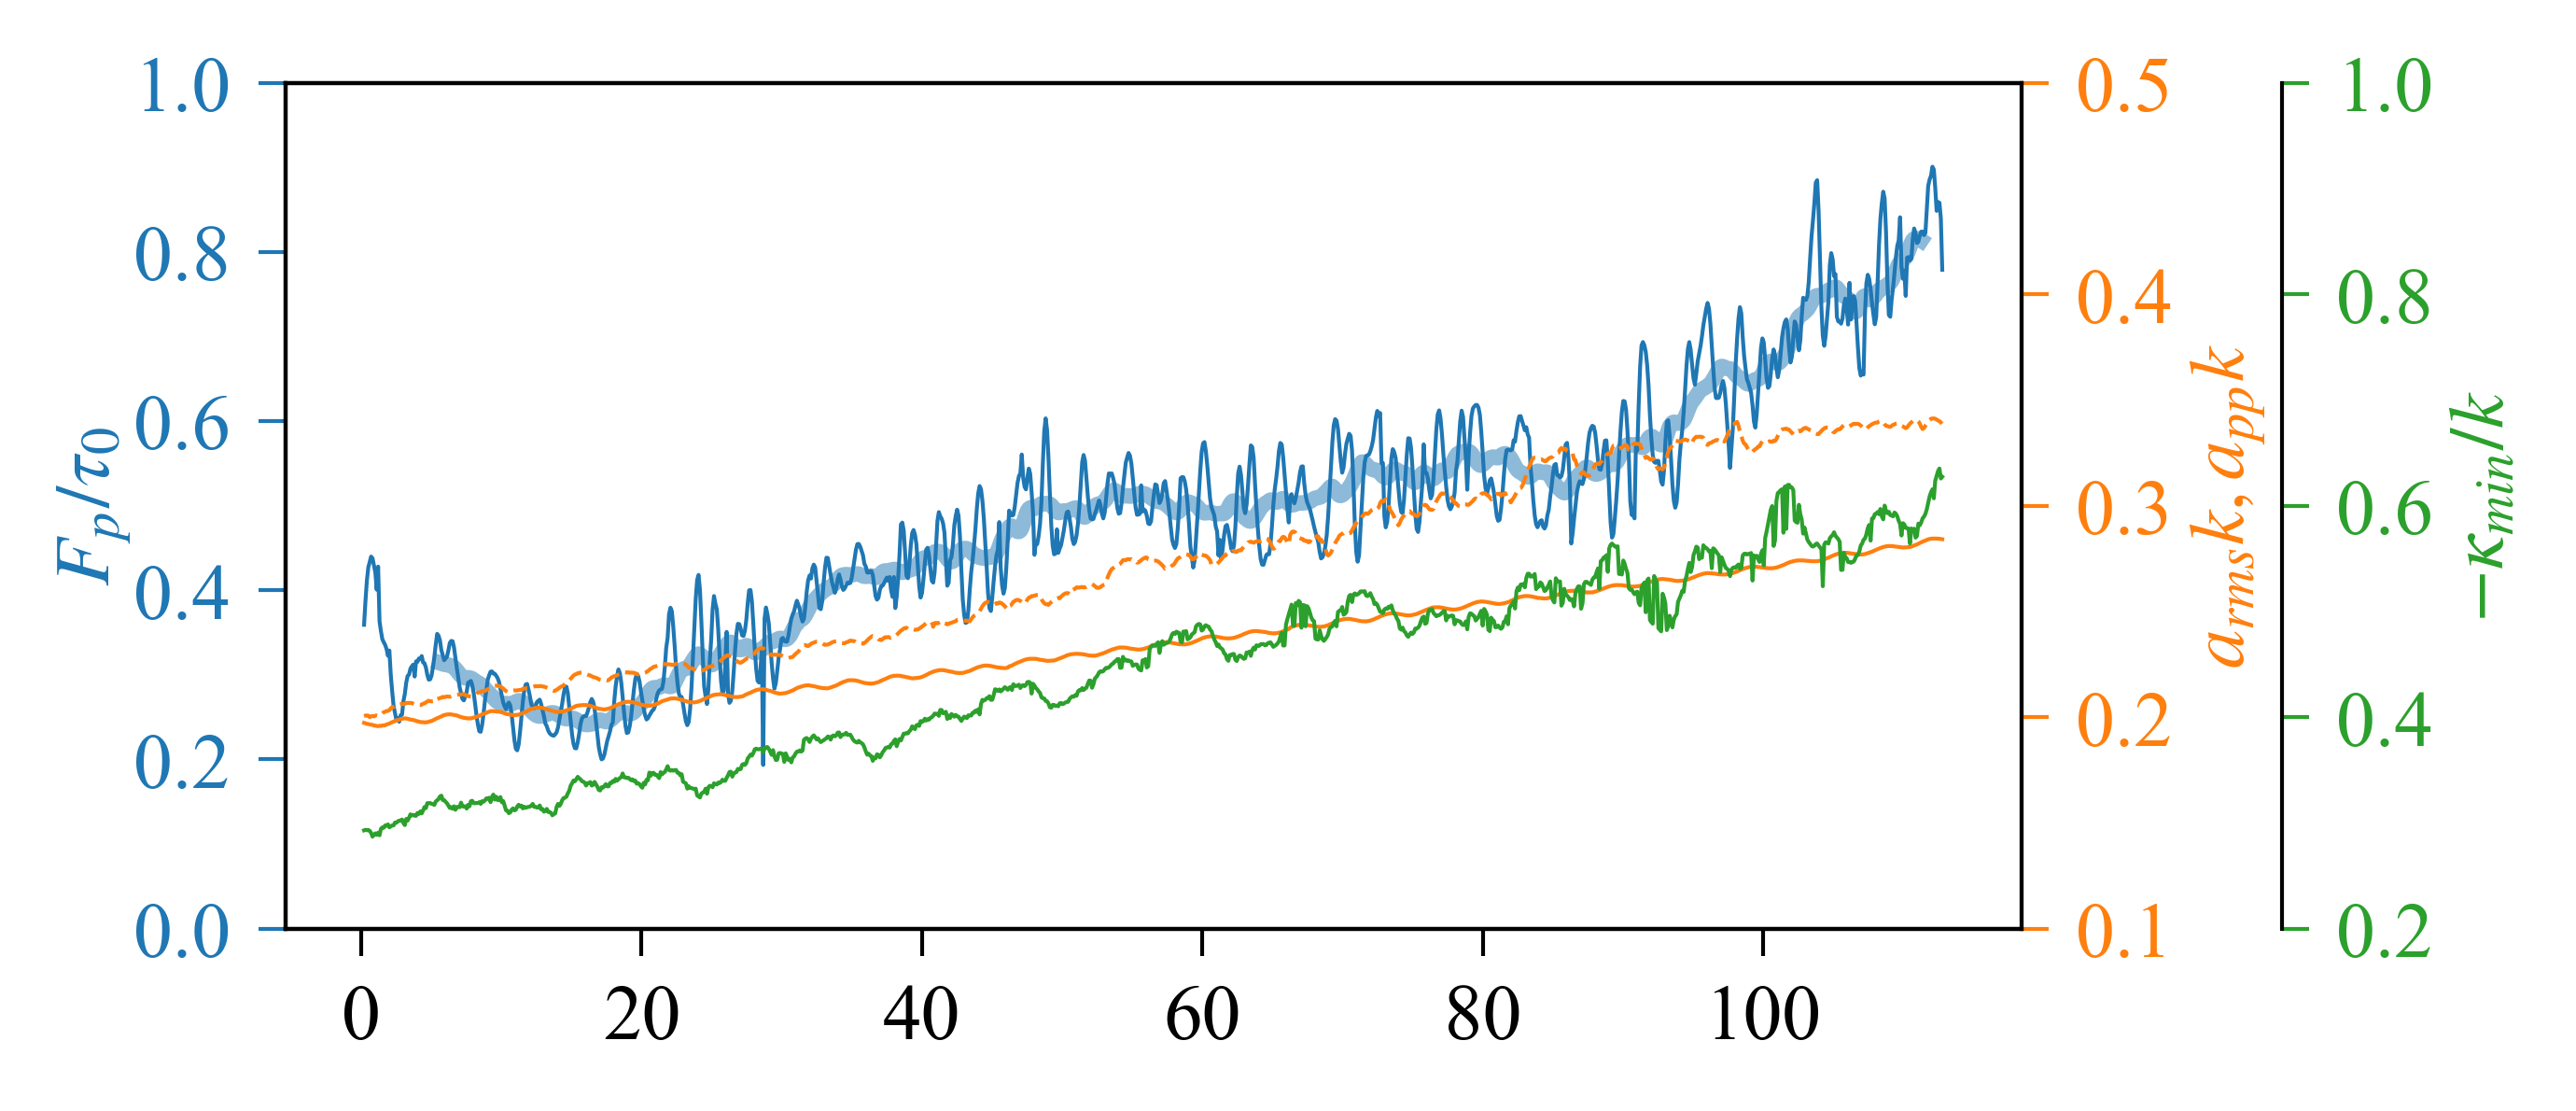

In [24]:
fig = plt.figure(figsize=[4,2]); ax1 = plt.gca()

def compute (case, index):
    """ index: the index of chunks of times 
        time_norm: quantity used to normalize time, should be """
    t = []; Fp = []
    for i in index:
        print(i)
    #    plt.plot(case.time_highfreq_ensem[i][0:-1], case.Fp_highfreq_ensem[i]/case.rho2/case.ustar**2, marker='o', mfc='none', lw=0, markersize=2, markeredgewidth=0.5, c=plt.get_cmap('summer')(i/5))
    #    plt.plot((case.time_highfreq_ensem[i]-case.tstart)*case.wave.omega, case.Fp_highfreq_ensem[i]/case.rho2/case.ustar**2, c=plt.get_cmap('summer')(i/5), lw=0.5)
        t.extend(case.time_highfreq_ensem[i])
        Fp.extend(case.Fp_highfreq_ensem[i]/case.rho2/case.ustar**2)  
    Fp = np.array(Fp); t = np.array(t)

    app = []; arms = []; curvmin = []
    for i in index:
        print(i)
        variance = [np.var(eta) for eta in case.phase_highfreq_ensem[i]['eta']] 
        pp = [(eta.max()-eta.min())/2. for eta in case.phase_highfreq_ensem[i]['eta']] 
        etamax = [eta.max() for eta in case.phase_highfreq_ensem[i]['eta']] 
        print(etamax)
    #     kurtosis = [np.average((eta-np.average(eta))**4)**1/4 for eta in case.phase_highfreq_ensem[i]['eta']]
        arms.extend(np.array(variance)**0.5*1.41)
        app.extend(pp)
        # Compute curvature
        curvature = []
        for j in range(len(case.phase_highfreq_ensem[i]['eta'])):
            eta_1D = np.roll(np.average(case.phase_highfreq_ensem[i]['eta'][j], axis=0), -case.phase_highfreq_ensem[i]['idx'][j], axis=0) - 1  
            curvature.append(curv_min(eta_1D))
        curvmin.extend(curvature)
    #     ax2.plot((case.time_highfreq_ensem[i]-case.tstart)*omega, np.array(pp)*case.k, lw=0.5, c=plt.get_cmap('summer')(i/5))
    #     ax2.plot((case.time_highfreq_ensem[i]-case.tstart)*omega, np.array(variance)**0.5*1.41*case.k, '--', lw=0.5, c=plt.get_cmap('summer')(i/5))
    app = np.array(app); arms = np.array(arms); curvmin = np.array(curvmin)
    return t, Fp, app, arms, curvmin

def plot (t, Fp, app, arms, curvmin, case):
    window = 40
    data = Fp.copy()
    ax1.plot(t, data, lw=0.5, c='C0')
    data_trim = np.copy(data[30:])
    t_trim = np.copy(t[34:])
    average_data = []
    average_t = []
    for ind in range(int(window/2), len(data_trim) - int(window/2) + 1):
        average_data.append(np.mean(data_trim[ind-int(window/2):ind+int(window/2)]))  
        
    ax1.plot(t_trim[int(window/2):len(data_trim) - int(window/2) + 1], average_data[:], lw=2, alpha=0.5, c='C0') 
    ax1.yaxis.label.set_color('C0')
    ax1.tick_params(axis='y', colors='C0')
#     ax1.set_ylim([0., 0.4])
    ax1.set_ylim([0., 1])
    ax1.set_ylabel(r'$F_p/\tau_0$', labelpad=0)

    """ The various ak """
    ax2 = ax1.twinx()
    ax3 = ax1.twinx()
    ax3.spines.right.set_position(("axes", 1.15))
    ax2.set_ylabel('$a_{rms}k, a_{pp} k$', labelpad=2)
    ax3.set_ylabel('$-\kappa_{min}/k$', labelpad=2)

    ax2.plot(t, np.array(app)*case.k, '--', lw=0.5, c='C1')
    ax2.plot(t, np.array(arms)*case.k, lw=0.5, c='C1')
    # ax2.spines['right'].set_color('C1')
    ax2.yaxis.label.set_color('C1')
    # tkw = dict(size=4, width=1.5)
    # ax2.tick_params(axis='y', colors='C1', **tkw)
    ax2.tick_params(axis='y', colors='C1')
    ax2.set_ylim([0.1, 0.5])
    ax3.plot(t, -np.array(curvmin)/case.k, lw=0.5, c='C2')
    ax3.set_ylim([0.2, 1])
    ax3.yaxis.label.set_color('C2')
    ax3.tick_params(axis='y', colors='C2')
    

""" The moving wave high frequency sampling """
case = case1
t, Fp, app, arms, curvmin = compute (case, [0,1,2,3,4,5,6])
t = (t-case.tstart)*case.wave.omega
plot(t, Fp, app, arms, curvmin, case)

# case = case3
# t, Fp, app, arms, curvmin = compute (case, [0,1,2,3])
# t = (t-case.tstart)*case.wave.omega
# plot(t, Fp, app, arms, curvmin, case)

""" Add the precursor """
t, Fp, app, arms, curvmin = compute (case_pre1, [0])
t = (t-case1.tstart)*case.wave.omega # Precursor omega goes with the moving wave
plot(t, Fp, app, arms, curvmin, case_pre1)

def forward(t):
    global case
    return t/case.wave.omega/(2*np.pi/4/3)
def back(t):
    global case
    return t*case.wave.omega*(2*np.pi/4/3)
secax_x2 = ax1.secondary_xaxis(-0.2, functions=(forward, back))
ax1.annotate(r'$\omega t$', xy=(1.05, -0.05), ha='left', va='top', xycoords='axes fraction')
ax1.annotate(r'$t/T_{e}$', xy=(1.05, -0.2), ha='left', va='top', xycoords='axes fraction')

# ax1.set_xlim([-40, 150])
# ax1.set_xticks([-40,0,50,100,150])
# secax_x2.set_xticks([-8,-4,0,4,8,12,16,20,24,28,32,36])
ax1.set_xlim([-20, 120])
ax1.set_xticks([-20,0,20,40,60,80,100,120])
secax_x2.set_xticks([-8,0,16,32,48,64,80,96,112])
# fig.savefig('review/evolution_ak02_CU8.pdf', bbox_inches='tight')
# fig.savefig('review/evolution_ak02_CU2.pdf', bbox_inches='tight')

In [32]:
sequence1 = np.array([(eta.max()-eta.min())/2. for eta in case.phase_highfreq_ensem[-1]['eta']])
sequence2 = np.array([np.std(eta) for eta in case.phase_highfreq_ensem[-1]['eta']])

In [34]:
sequence1*4

array([0.338412, 0.338766, 0.33859 , 0.338718, 0.338742, 0.338408,
       0.337936, 0.337208, 0.336352, 0.336364, 0.336326, 0.337036,
       0.337606, 0.338048, 0.33856 , 0.338834, 0.33918 , 0.339284,
       0.339334, 0.339866, 0.34015 , 0.33996 , 0.339404, 0.33845 ,
       0.33784 , 0.33763 , 0.337388, 0.337278, 0.337748, 0.338244,
       0.338458, 0.338844, 0.338974, 0.338642, 0.338186, 0.337754,
       0.337506, 0.337096, 0.336652, 0.33704 , 0.337964, 0.338794,
       0.339422, 0.339876, 0.340392, 0.3406  , 0.34043 , 0.339838,
       0.338838, 0.337322, 0.336258, 0.33674 , 0.33785 , 0.338808,
       0.339698, 0.340566, 0.34109 , 0.341246, 0.341254, 0.34112 ,
       0.340704, 0.3403  , 0.33997 , 0.339394, 0.338544])

200


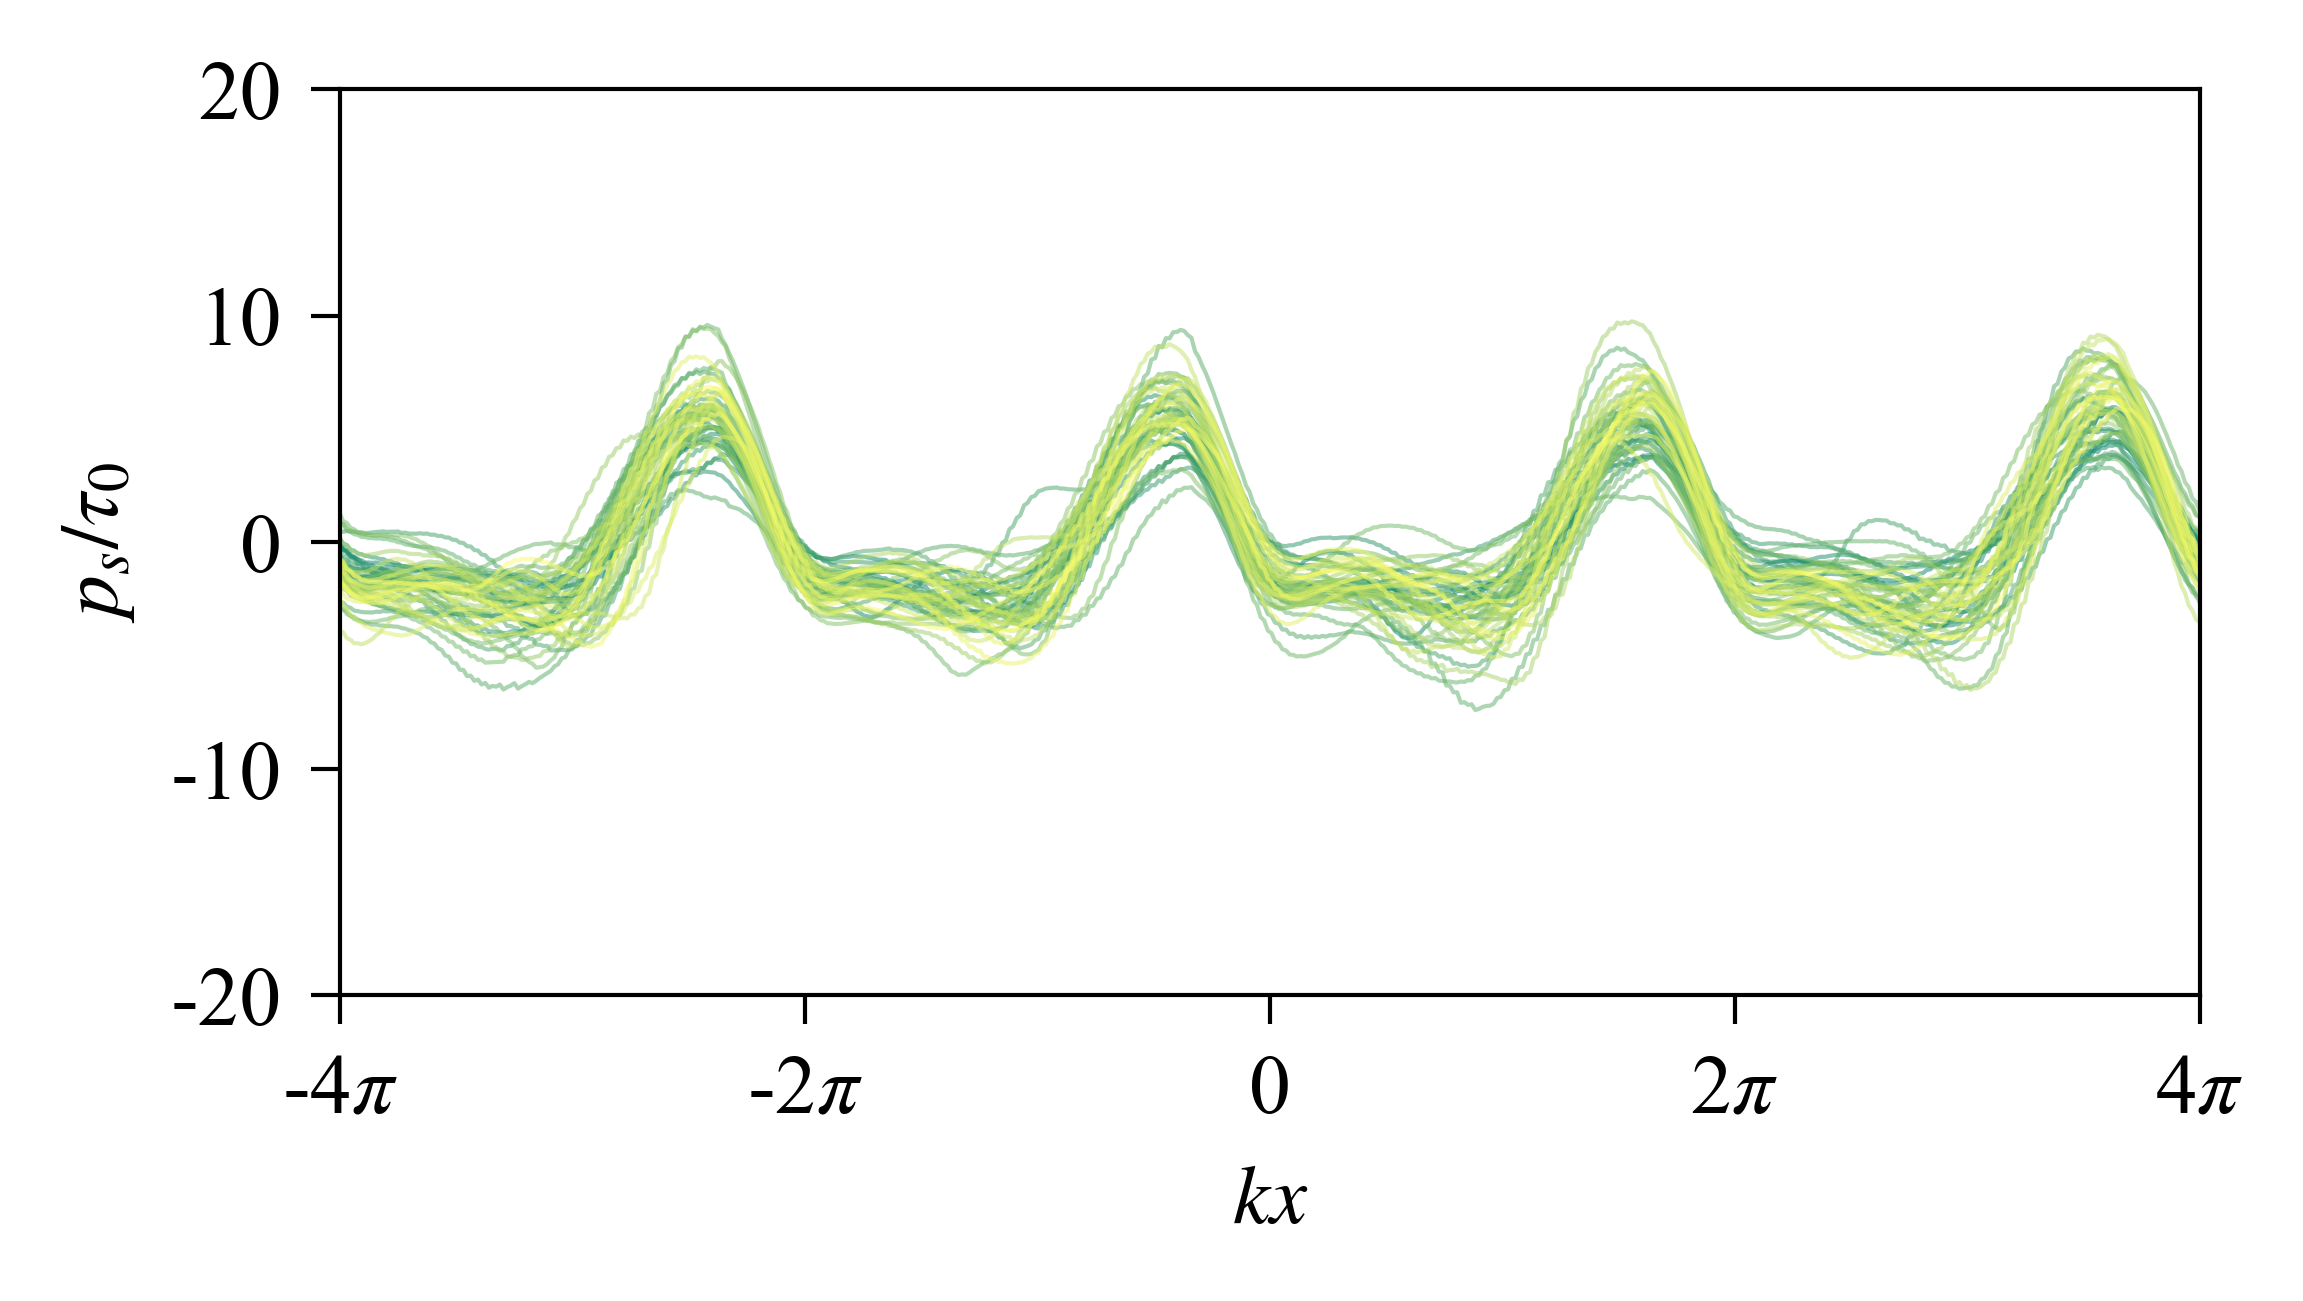

In [151]:
""" Visualization of instantaneous pressure """ 
from matplotlib.ticker import FuncFormatter, MultipleLocator

fig = plt.figure(figsize=[4,2]); ax=plt.gca()
x = np.linspace(-np.pi,np.pi,512)
for i in range(1,2):
    print(len(case.p_1D_highfreq_ensem[i]))
    for j in np.arange(0, len(case.p_1D_highfreq_ensem[i]), 4):
        plt.plot(x*case.k, case.p_1D_highfreq_ensem[i][j]/case.rho2/case.ustar**2, c=plt.get_cmap('summer')(j/len(case.p_1D_highfreq_ensem[i])), lw=0.5, alpha=0.5)
plt.ylim([-20,20])
plt.ylabel(r'$p_s/\tau_0$'); plt.xlabel('$kx$')
ax.xaxis.set_major_formatter(FuncFormatter(
   lambda val,pos: '{:.0g}$\pi$'.format(val/np.pi) if val !=0 else '0'
))
ax.set_xlim([-4*np.pi,4*np.pi])
ax.set_yticks([-20,-10,0,10,20])
ax.set_xticks([-4*np.pi,-2*np.pi,0,2*np.pi,4*np.pi])
fig.savefig('review/pressure_variation.pdf', bbox_inches='tight')

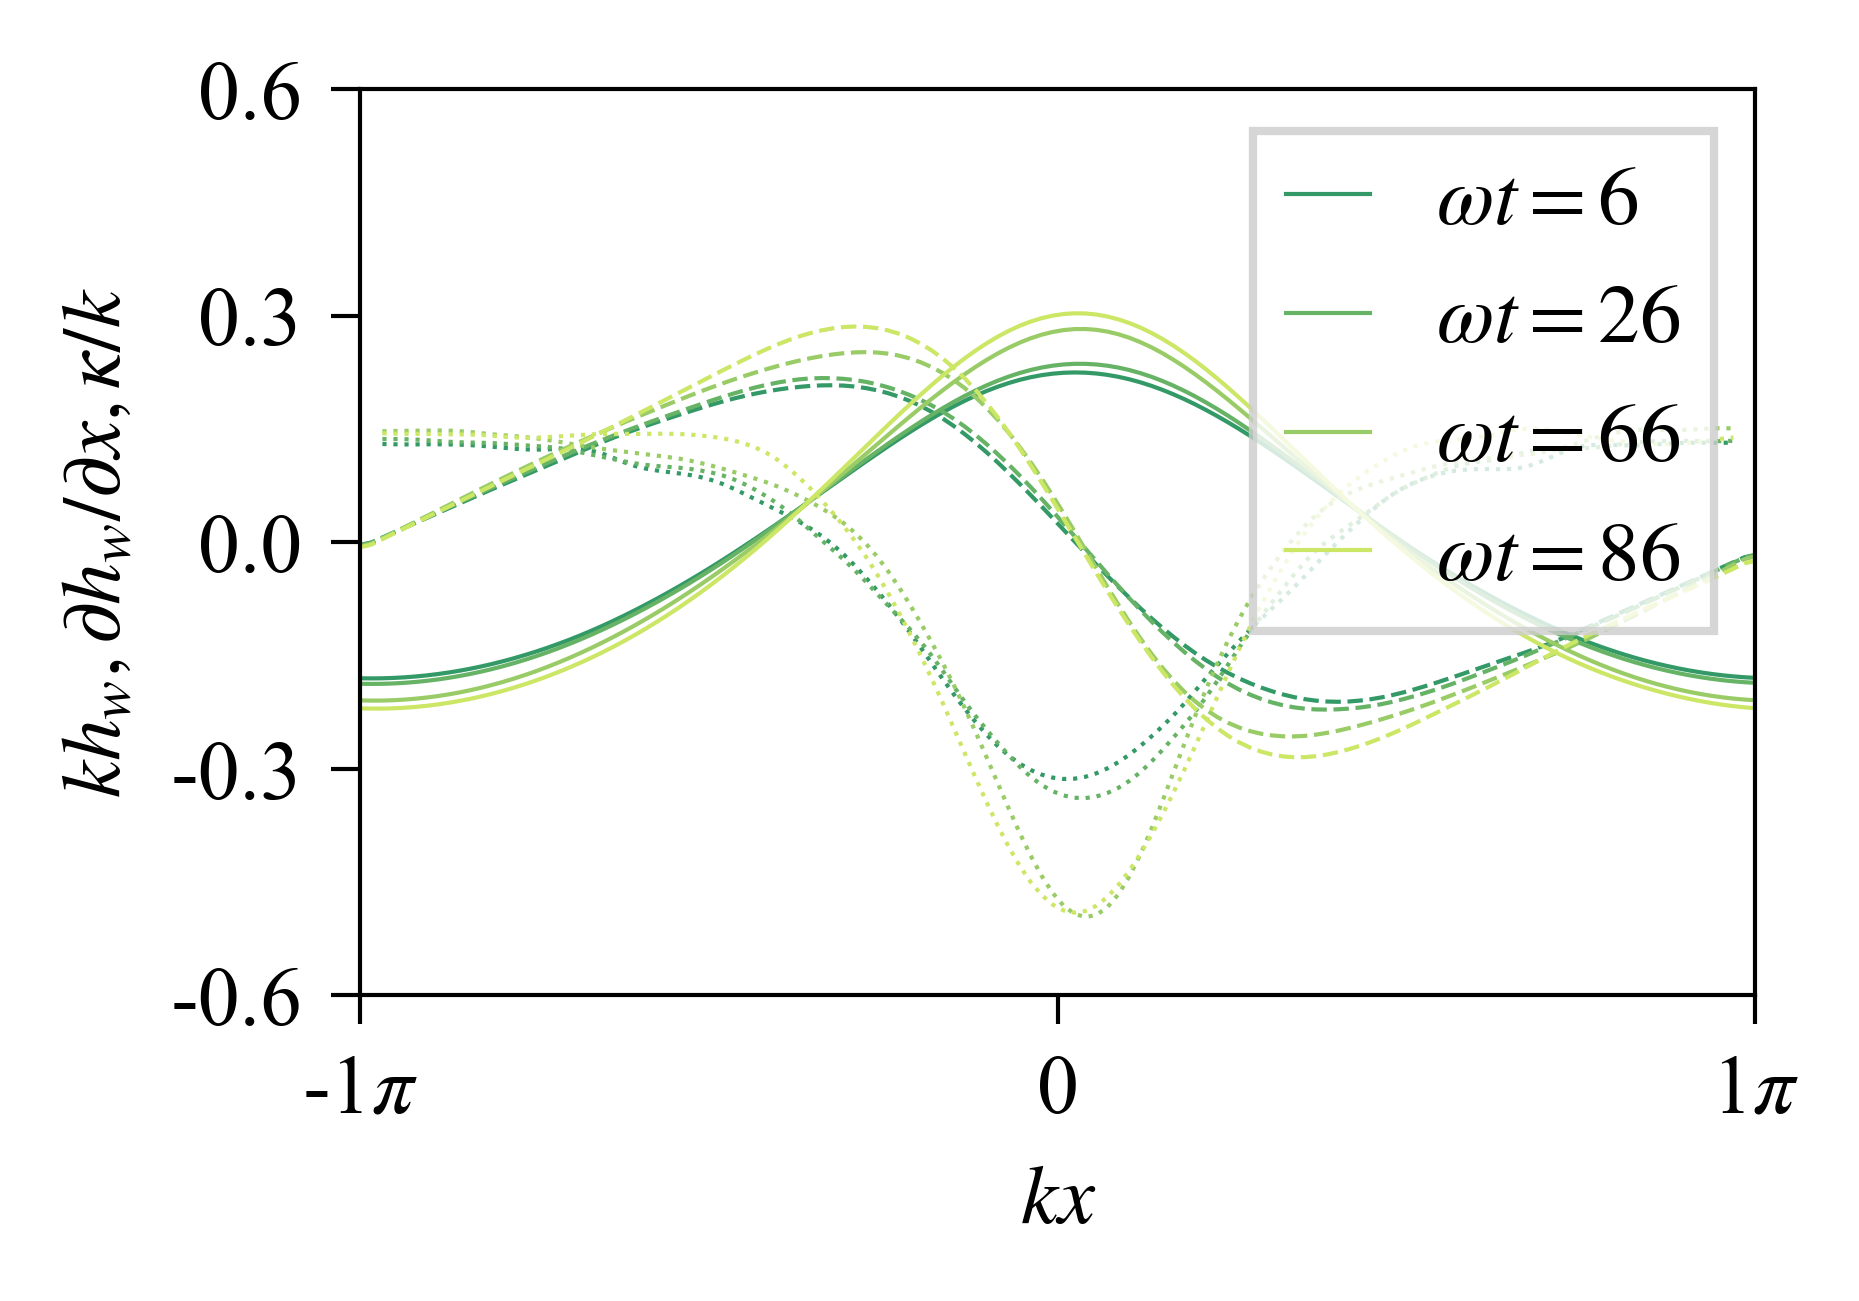

In [22]:
""" Wave shape:
    For the ak=0.2 case, pick t = np.array([60, 70, 90, 100]) """

fig = plt.figure(figsize=[3,2]); ax = plt.gca()

case = case1
x = np.linspace(-np.pi/4,np.pi/4,128)
for i,index in enumerate(np.array([1,2,4,5])):
    phase_highfreq = case.phase_highfreq_ensem[index]
    eta_1D = np.roll(np.average(phase_highfreq['eta'][0], axis=0), -phase_highfreq['idx'][0], axis=0) - 1  
    eta_1D_filter = butter_lowpass_filter(eta_1D, CUT=4)
    t = (phase_highfreq['t'][0])*case.wave.omega
    plt.plot(x*case.k, eta_1D_filter[63:63+128]*4, c=plt.get_cmap('summer')((i+1)/5), lw=0.5, label=r'$\omega t = %.0f$' %t)
    grad = np.gradient(eta_1D_filter[63:63+128],x)
    grad_filter = butter_lowpass_filter(grad, CUT=4)
    curv1 = np.gradient(grad_filter,x)/(1+grad_filter**2)**(1.5)
    curv2 = np.gradient(grad,x)/(1+grad**2)**(1.5)
    plt.plot(x*case.k, grad, '--', c=plt.get_cmap('summer')((i+1)/5), lw=0.5)
#     plt.plot(x, grad_filter, '--', c=plt.get_cmap('summer')(i/5), lw=0.5)
#     plt.plot(x, curv1, ':', c=plt.get_cmap('summer')(i/5), lw=0.5)
    plt.plot(x[2:-2]*case.k, curv2[2:-2]/case.k, ':', c=plt.get_cmap('summer')((i+1)/5), lw=0.5)

    
# waveshape = pd.read_csv('otherdata/Zdyrski2020_waveshape1.csv', names=['x','khw'], delimiter=',')
# plt.plot(waveshape['x'], waveshape['khw'], lw=0.5, c='k')
# waveshape = pd.read_csv('otherdata/Zdyrski2020_waveshape2.csv', names=['x','khw'], delimiter=',')
# plt.plot(waveshape['x'], waveshape['khw'], lw=0.5, c='k')

plt.ylim([-0.6,0.6])
plt.xlim([-np.pi,np.pi])
ax.xaxis.set_major_formatter(FuncFormatter(
   lambda val,pos: '{:.0g}$\pi$'.format(val/np.pi) if val !=0 else '0'
))
ax.set_yticks([-0.6,-0.3,0,0.3,0.6])
ax.set_xticks([-np.pi,0,np.pi])
plt.legend(fancybox=False, loc='upper right', handlelength=1)
plt.xlabel(r'$kx$')
plt.ylabel(r'$kh_w, \partial h_w/\partial x, \kappa/k$')
fig.savefig('./review/waveshape_CU2.pdf', bbox_inches='tight', pad_inches=0.1)

Text(0, 0.5, '$kh_w$')

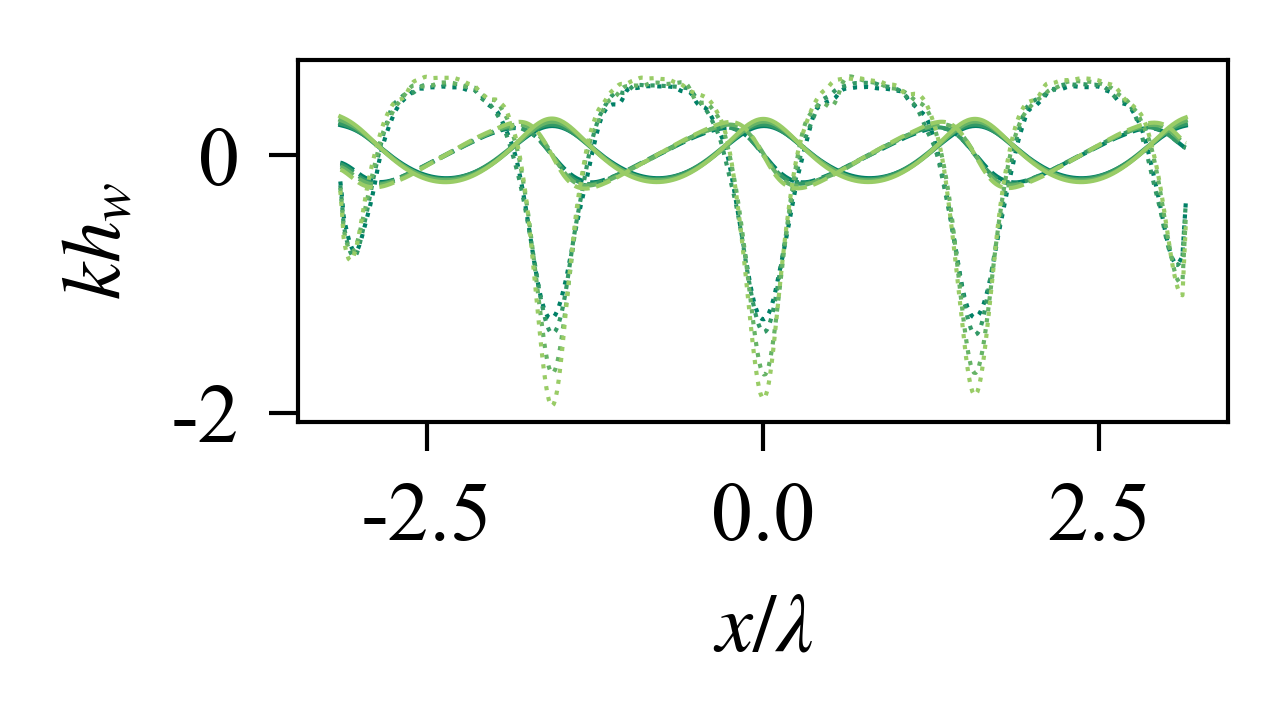

In [91]:
import pandas as pd
fig = plt.figure(figsize=[2,0.8])
x = np.linspace(-np.pi,np.pi,512)
for i in range(0,4):
    phase_highfreq = case.phase_highfreq_ensem[i]
    eta_1D = np.roll(np.average(phase_highfreq['eta'][i], axis=0), -phase_highfreq['idx'][i], axis=0) - 1  
    eta_1D_filter = butter_lowpass_filter(eta_1D, CUT=4)
    plt.plot(x, eta_1D_filter*4, c=plt.get_cmap('summer')(i/5), lw=0.5)
    grad = np.gradient(eta_1D_filter,x)
    grad_filter = butter_lowpass_filter(grad, CUT=4)
    curv1 = np.gradient(grad_filter,x)/(1+grad_filter**2)**(1.5)
    curv2 = np.gradient(grad,x)/(1+grad**2)**(1.5)
    plt.plot(x, grad, '--', c=plt.get_cmap('summer')(i/5), lw=0.5)
#     plt.plot(x, grad_filter, '--', c=plt.get_cmap('summer')(i/5), lw=0.5)
#     plt.plot(x, curv1, ':', c=plt.get_cmap('summer')(i/5), lw=0.5)
    plt.plot(x, curv2, ':', c=plt.get_cmap('summer')(i/5), lw=0.5)

    
# waveshape = pd.read_csv('otherdata/Zdyrski2020_waveshape1.csv', names=['x','khw'], delimiter=',')
# plt.plot(waveshape['x'], waveshape['khw'], lw=0.5, c='k')
# waveshape = pd.read_csv('otherdata/Zdyrski2020_waveshape2.csv', names=['x','khw'], delimiter=',')
# plt.plot(waveshape['x'], waveshape['khw'], lw=0.5, c='k')

# plt.ylim([-0.5,0.5])
# plt.xlim([-1,1])
plt.xlabel(r'$x/\lambda$')
plt.ylabel(r'$kh_w$')